In [1]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

In [30]:
train_merged = pd.read_csv('..\\result\\train_merged.csv')

In [31]:
item_categories = train_merged[['item_category_id','item_category_name','date_block_num','revenue']].groupby(['item_category_id','item_category_name','date_block_num']).sum()

In [32]:
item_categories

revenue
item_category_id item_category_name         date_block_num          
0                PC - Headsets / Headphones 0                 148.00
                                            1                  93.00
                                            3                  22.40
1                Accessories - PS2          0                 148.00
                                            1                 283.00
...                                                              ...
83               batteries                  29              33962.00
                                            30              38846.38
                                            31              37989.96
                                            32              37824.26
                                            33              45489.44

[2077 rows x 1 columns]

In [33]:
item_categories.reset_index(inplace=True)

In [34]:
item_category_id = item_categories['item_category_id'].unique()

In [35]:
item_category_id

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
      dtype=int64)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


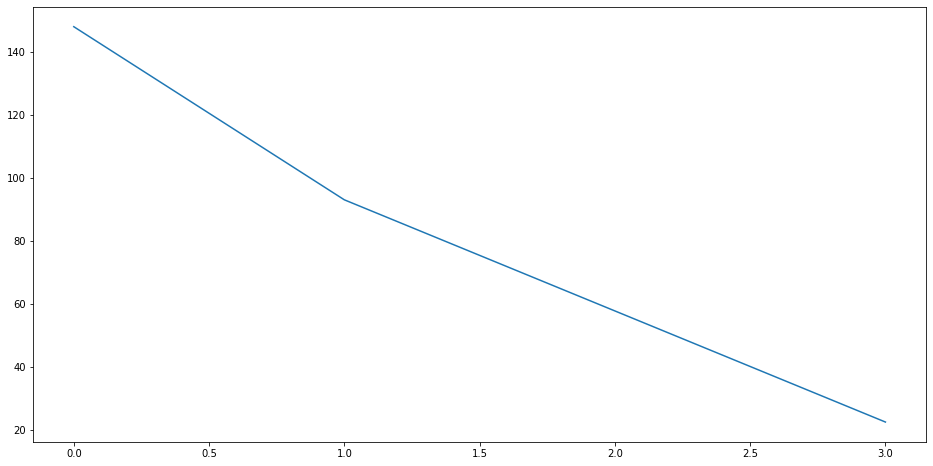

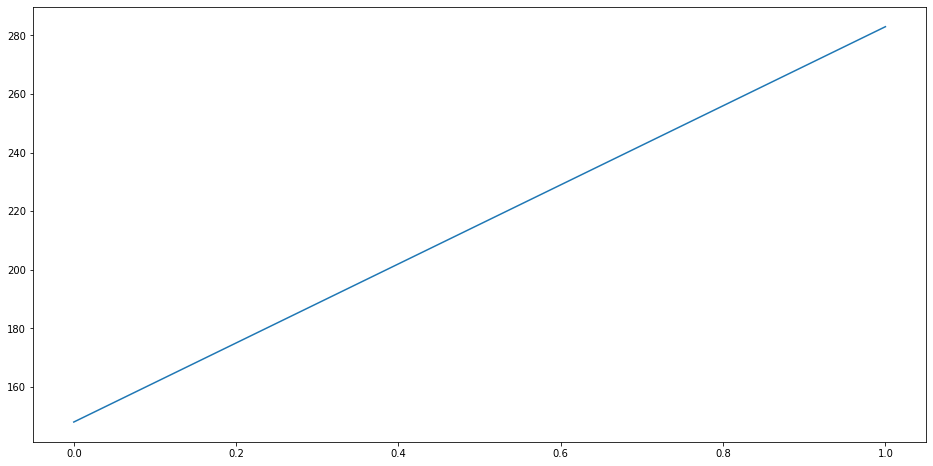

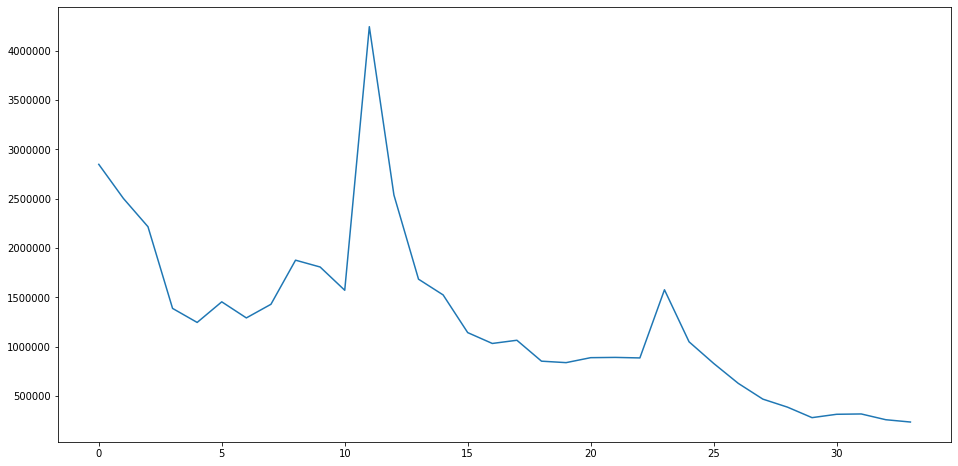

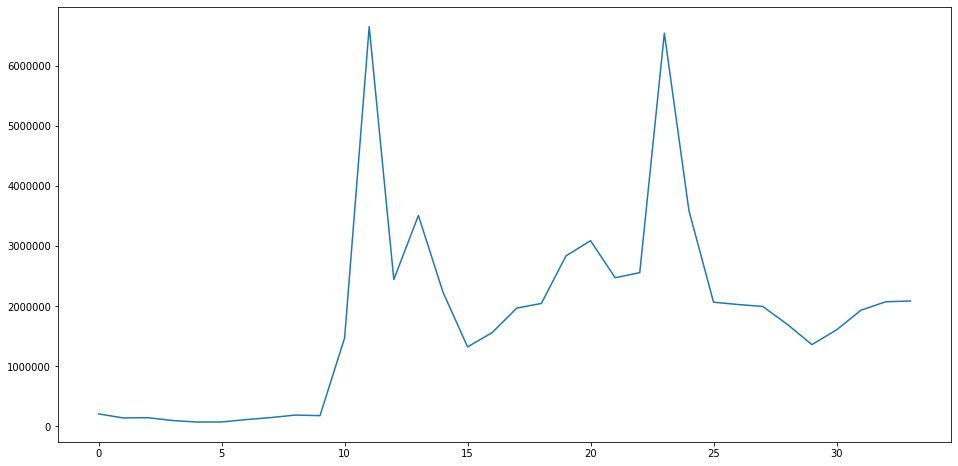

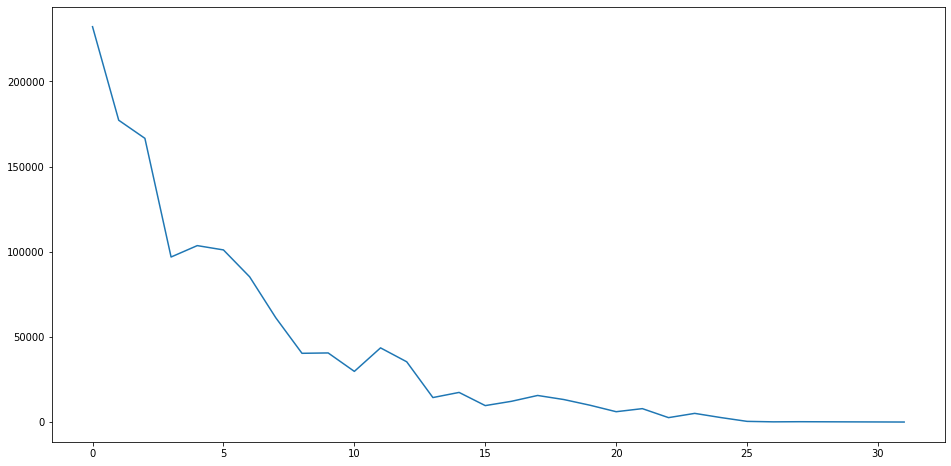

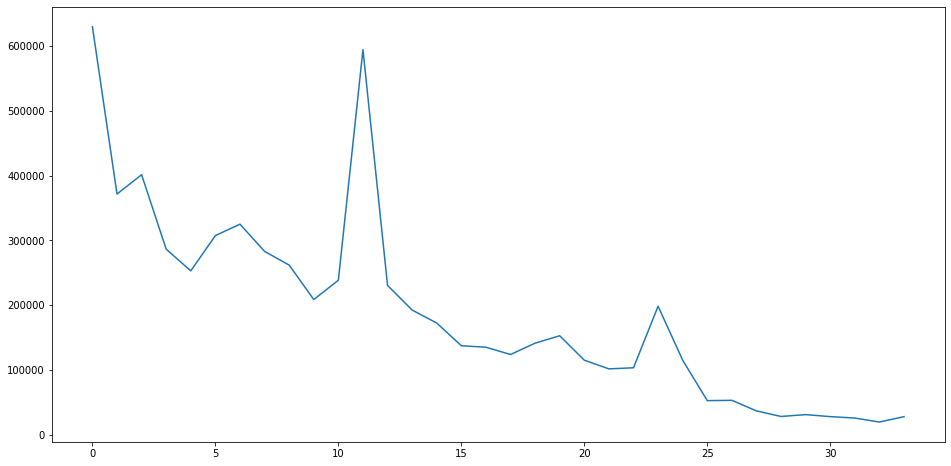

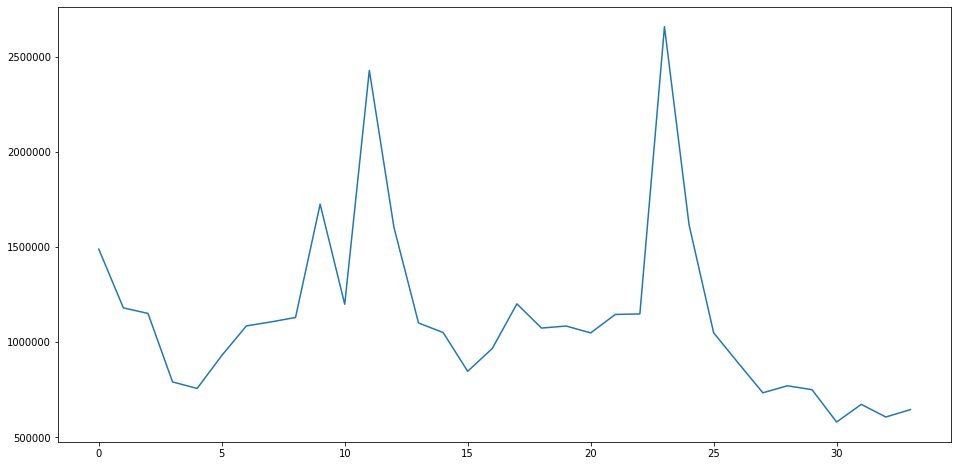

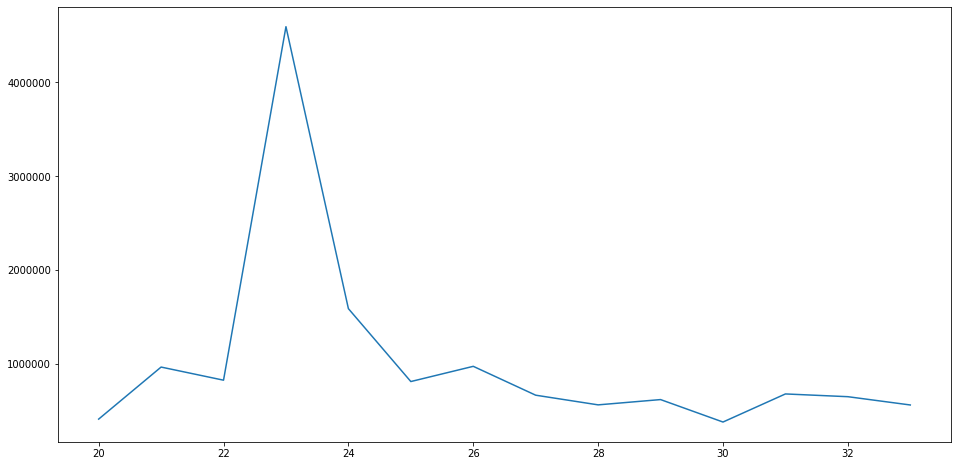

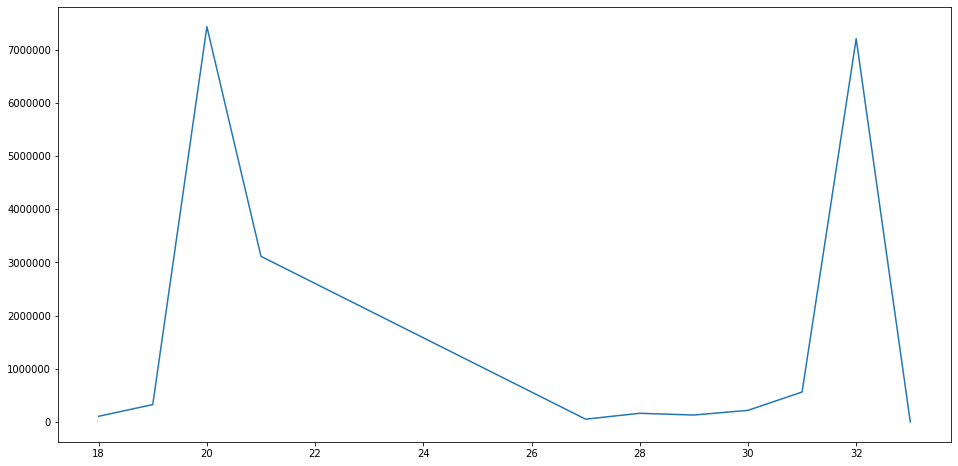

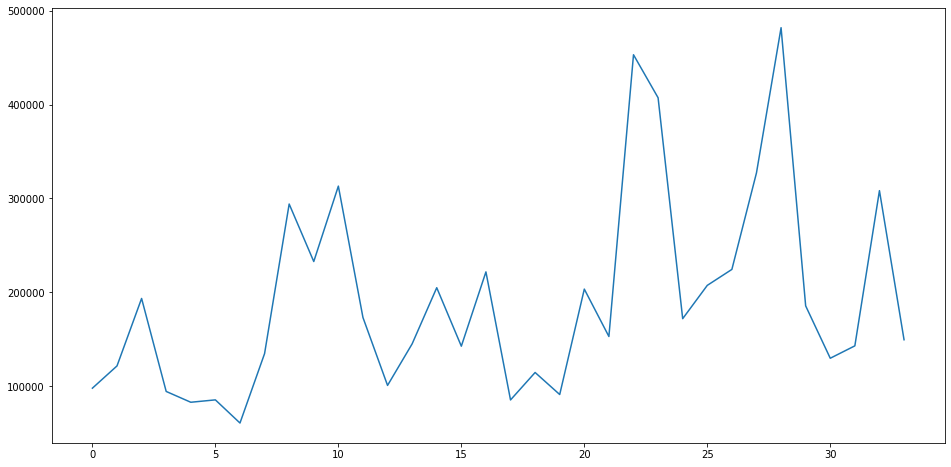

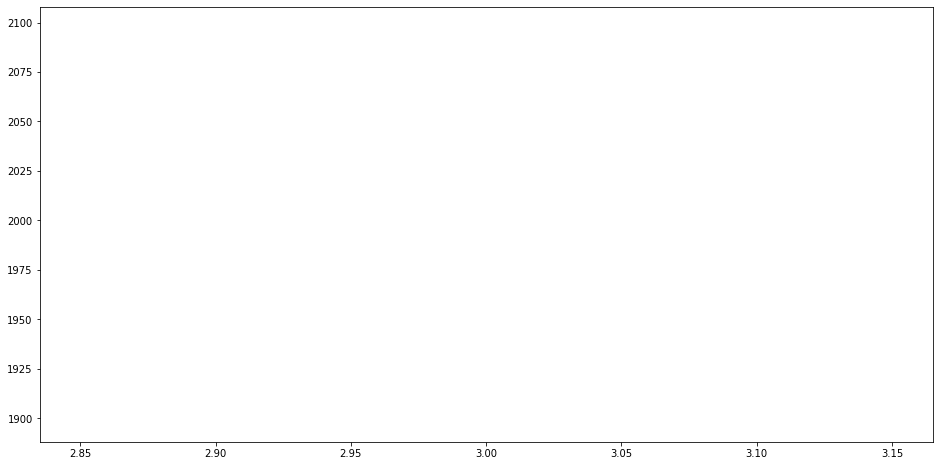

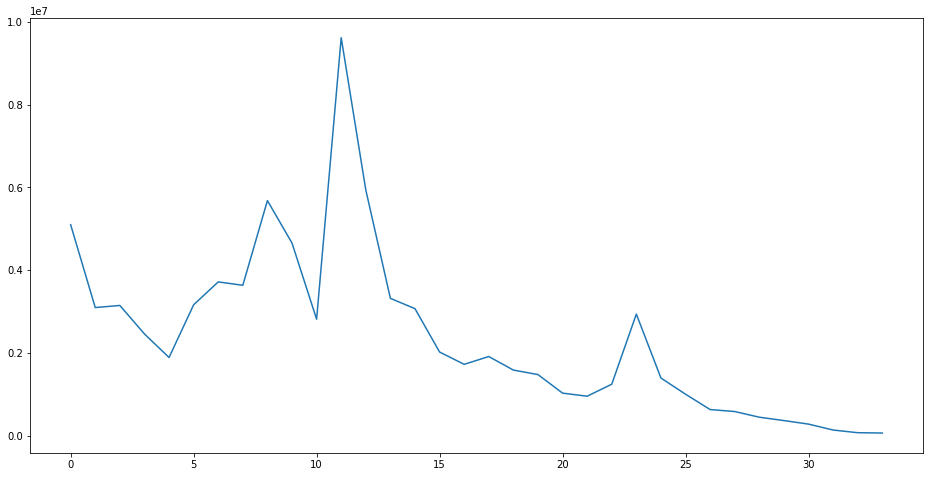

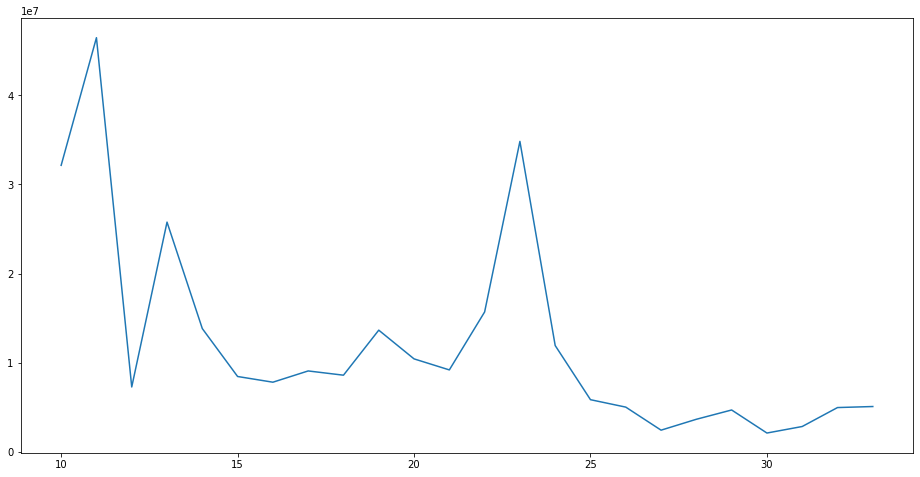

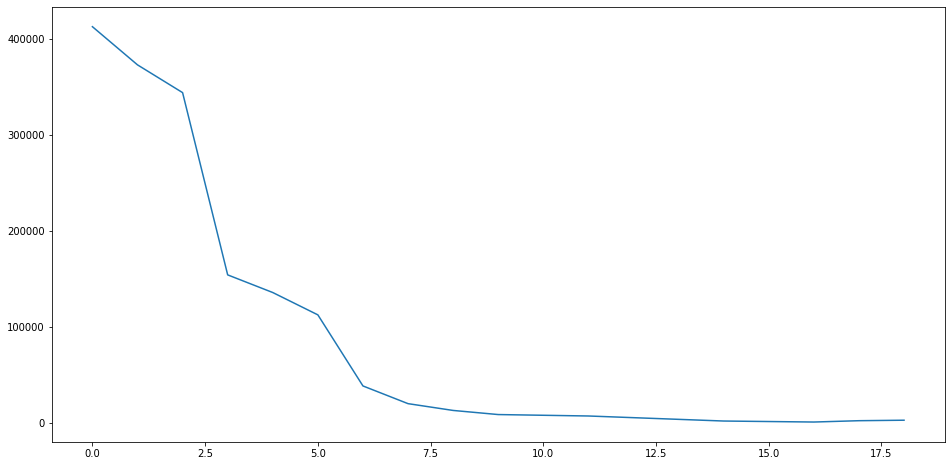

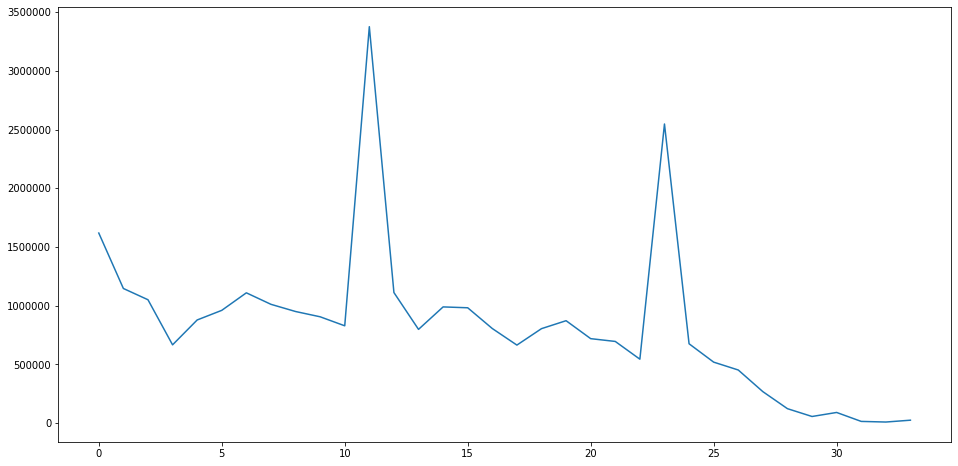

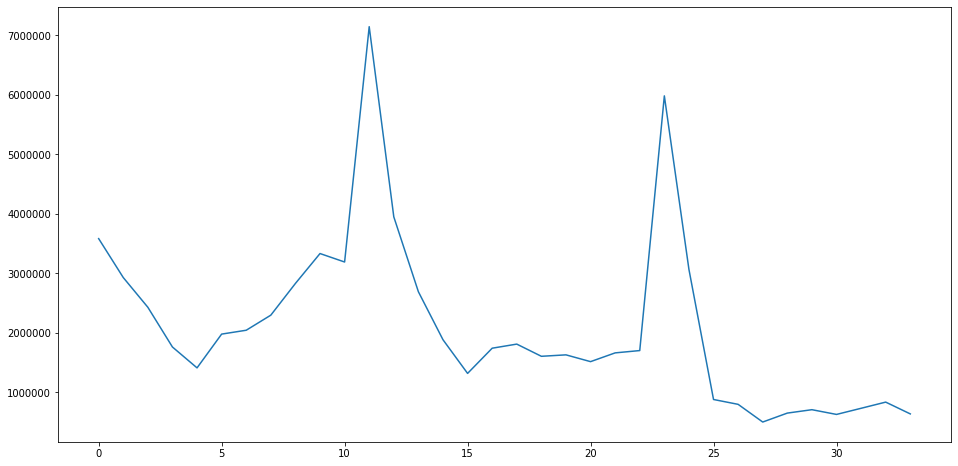

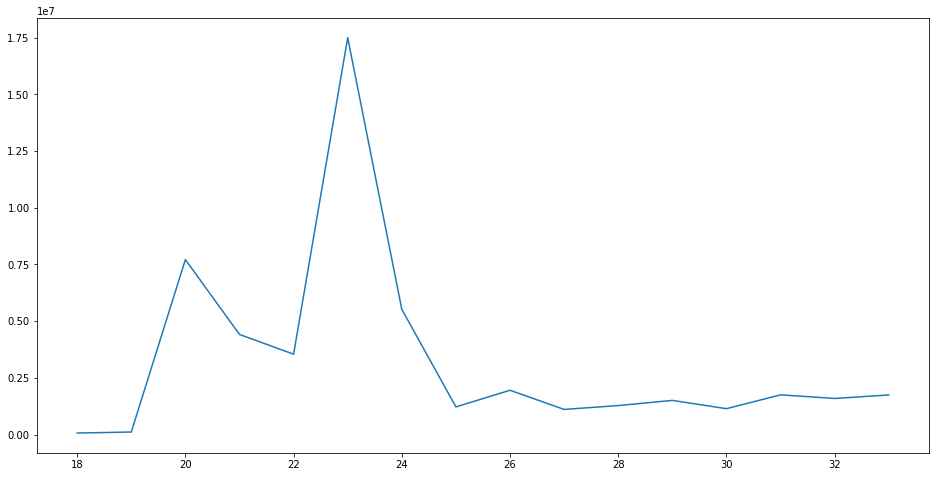

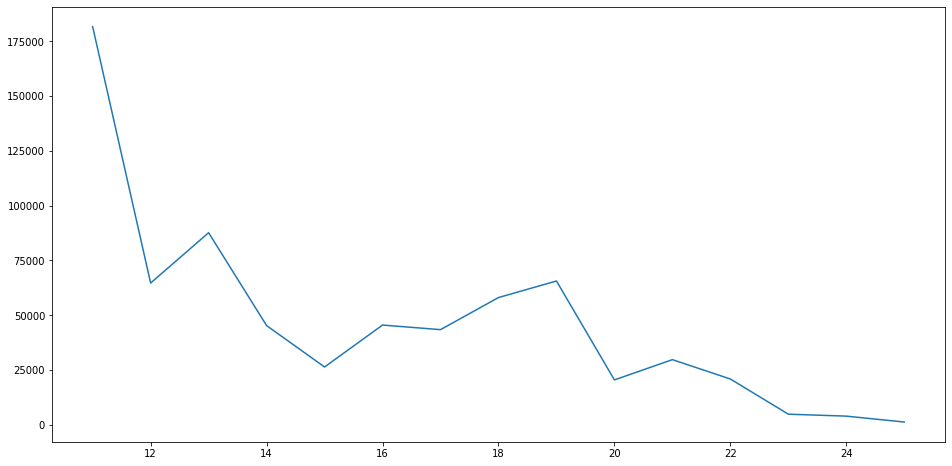

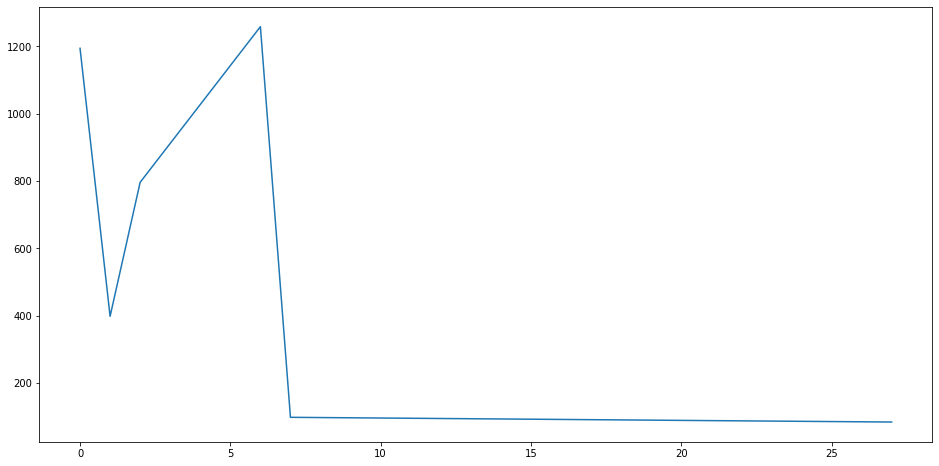

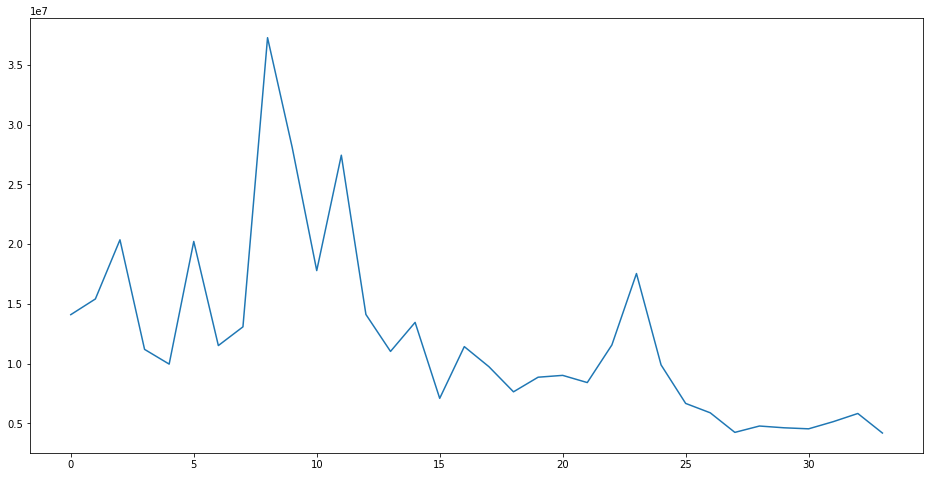

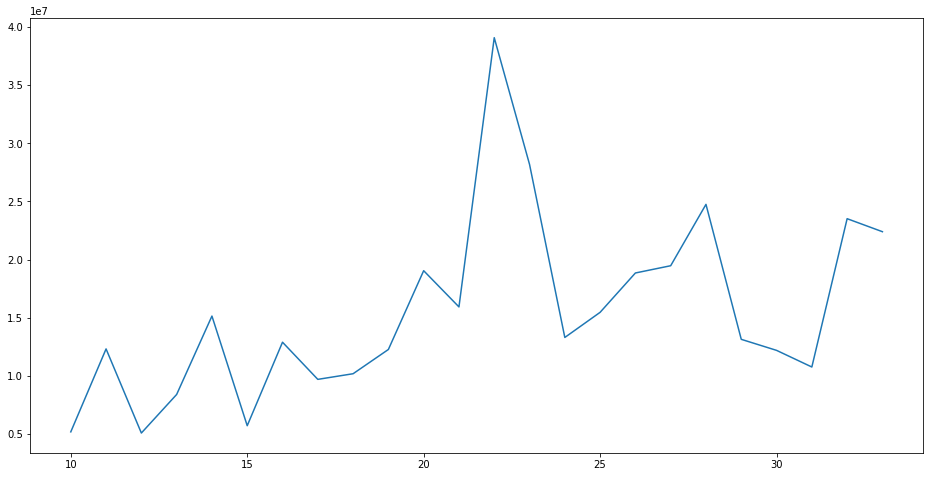

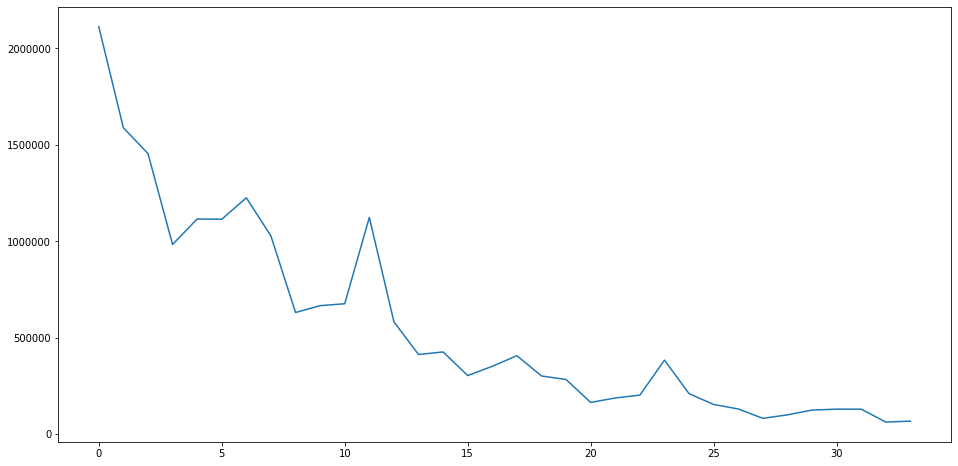

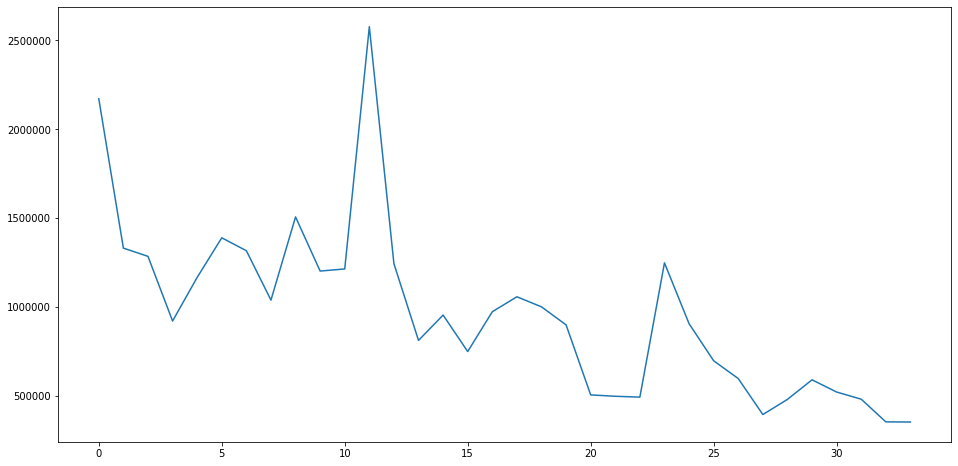

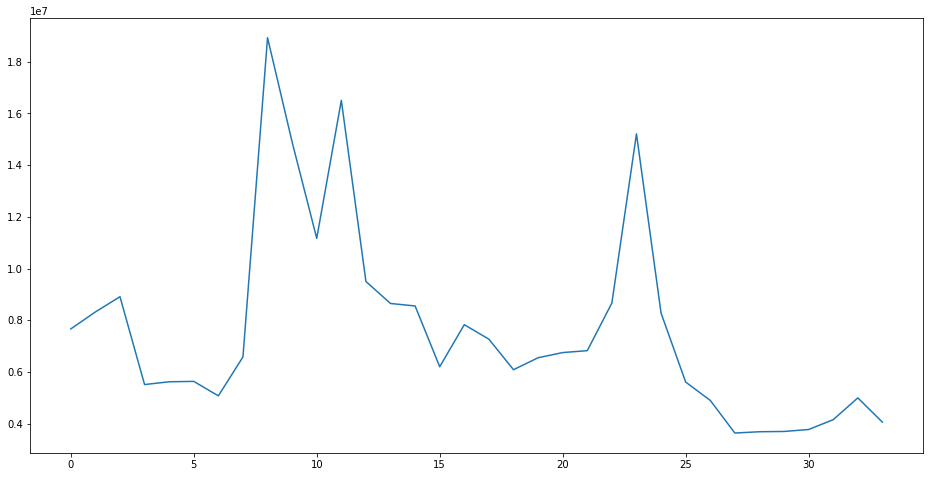

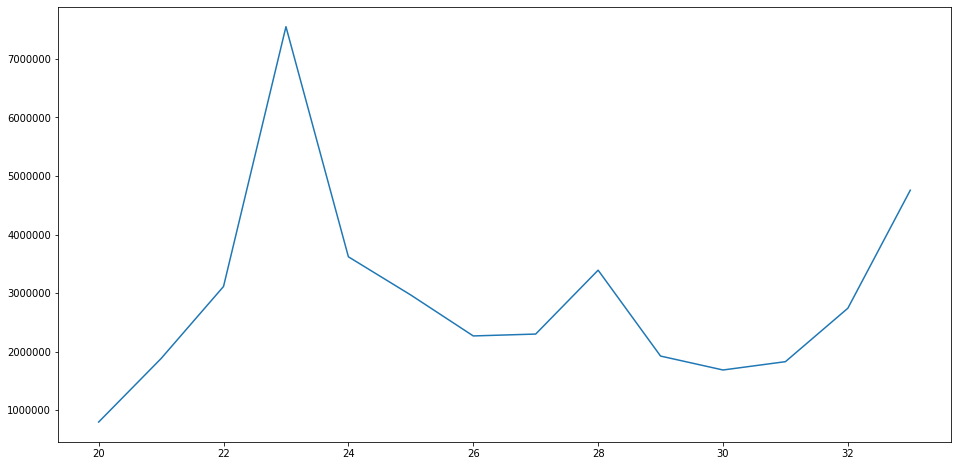

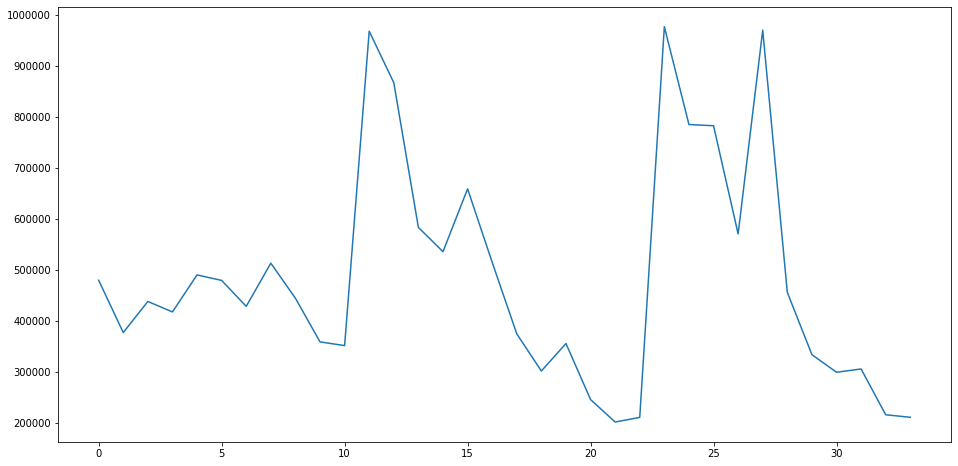

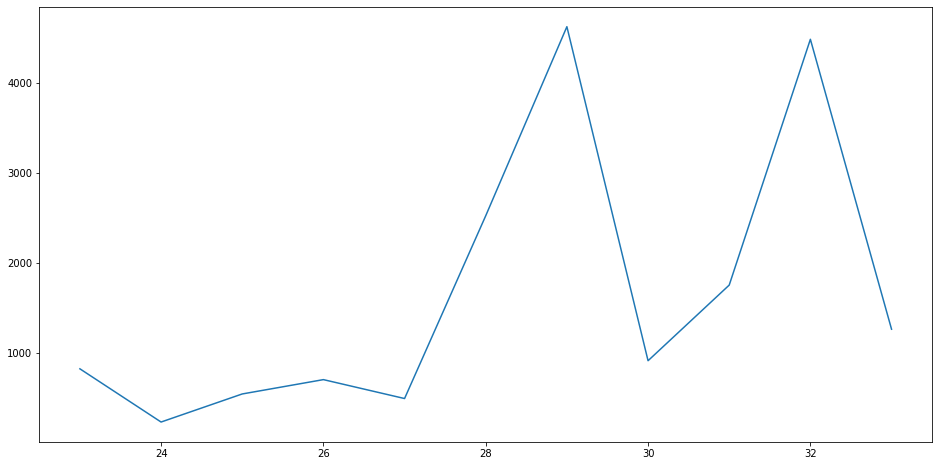

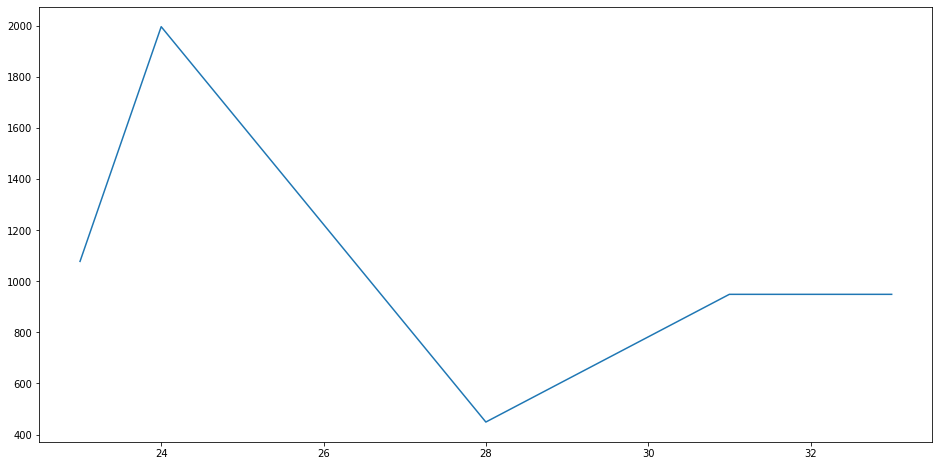

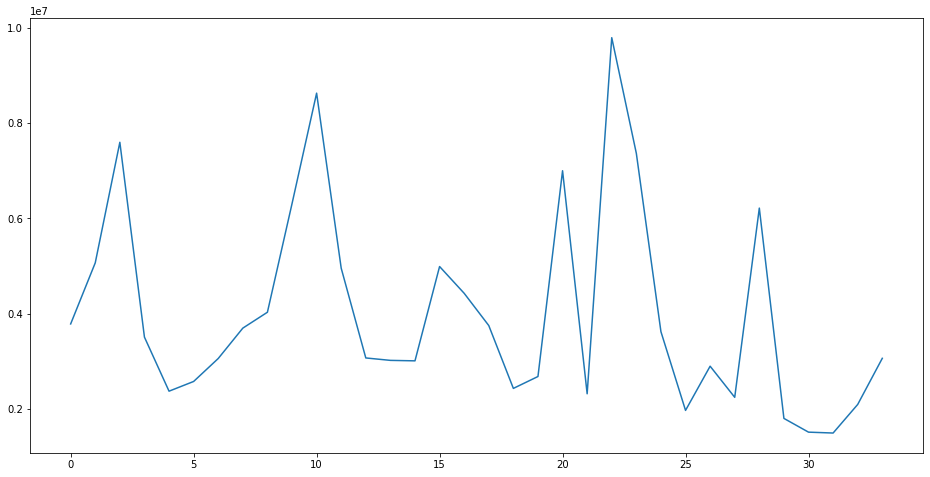

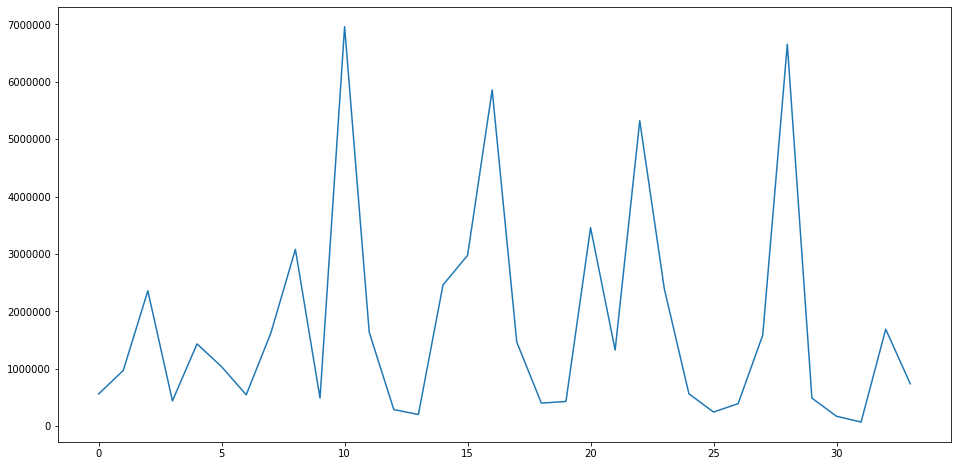

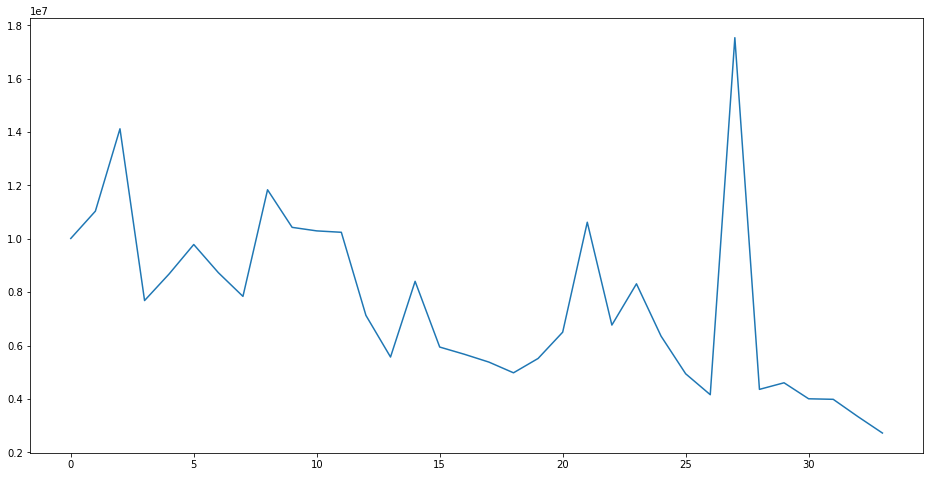

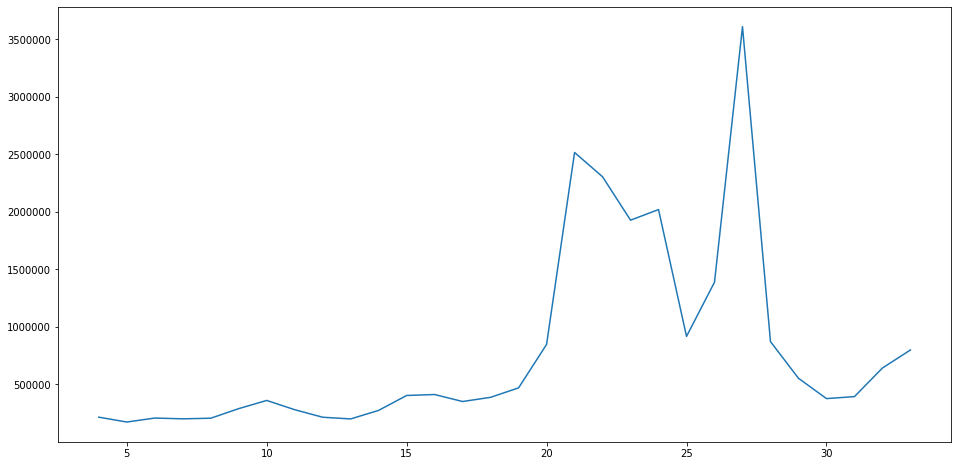

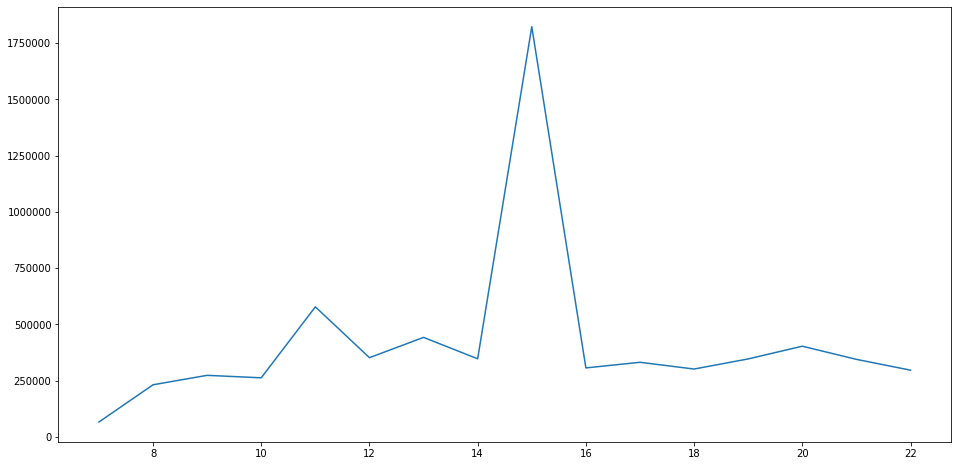

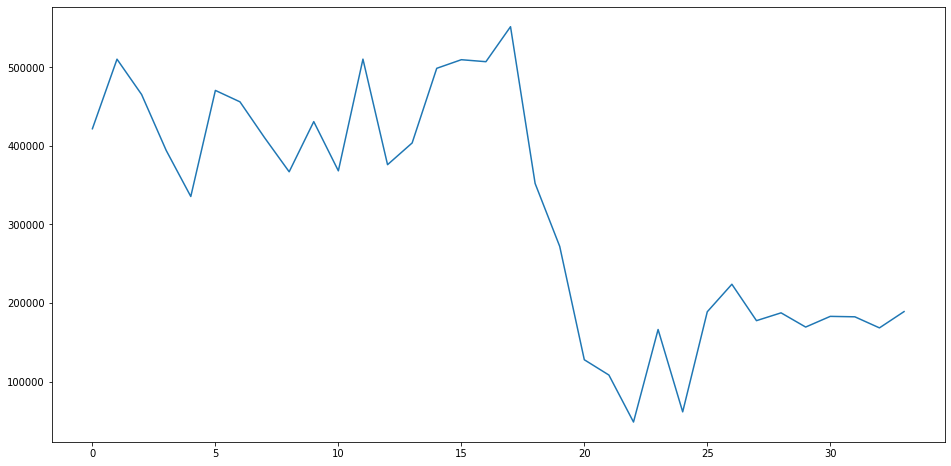

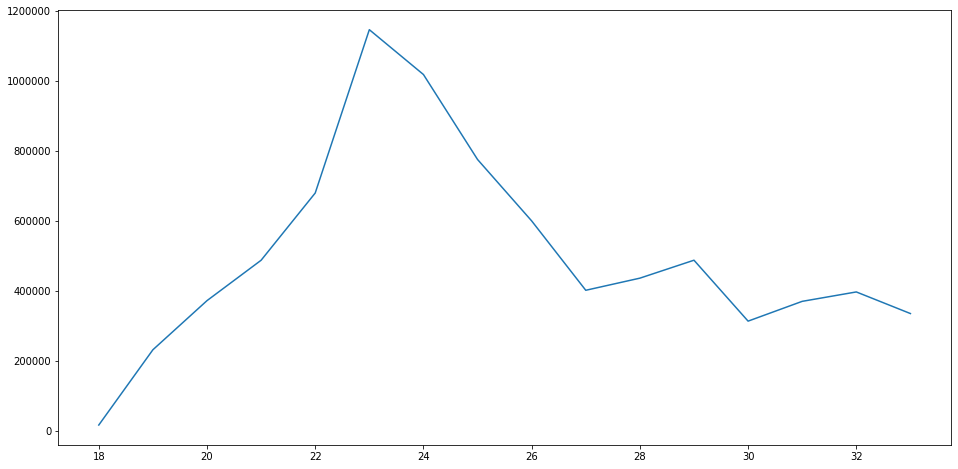

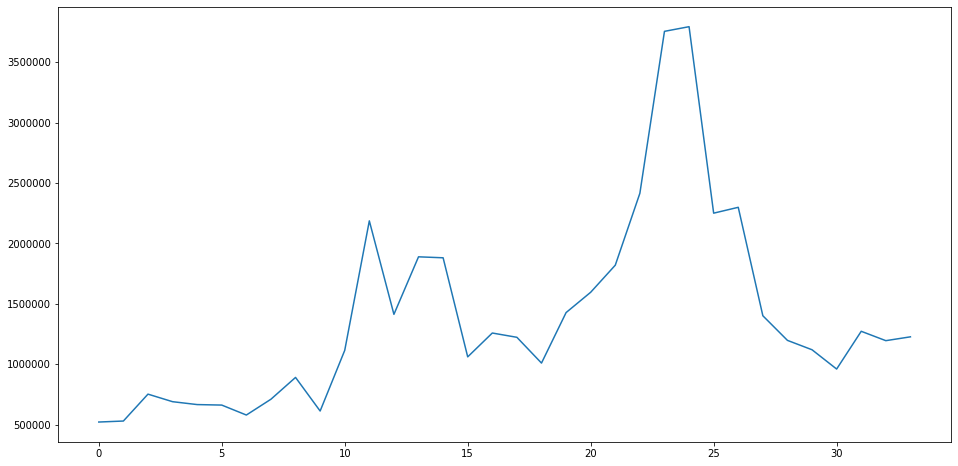

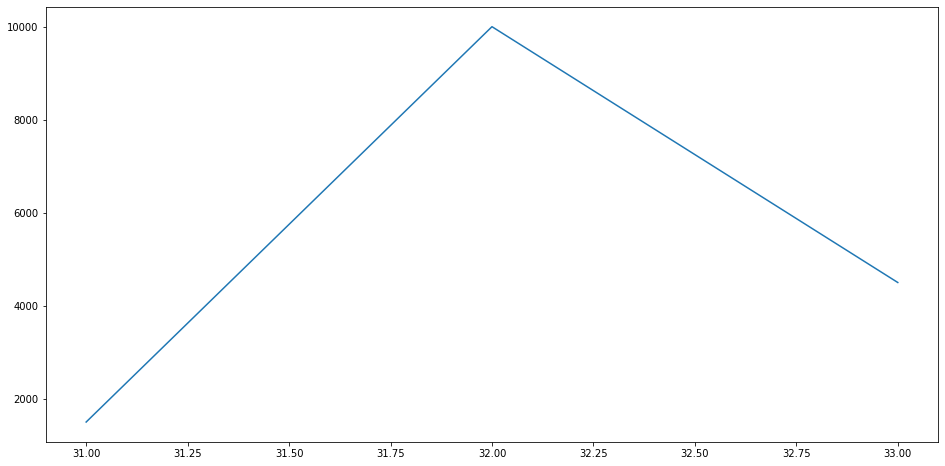

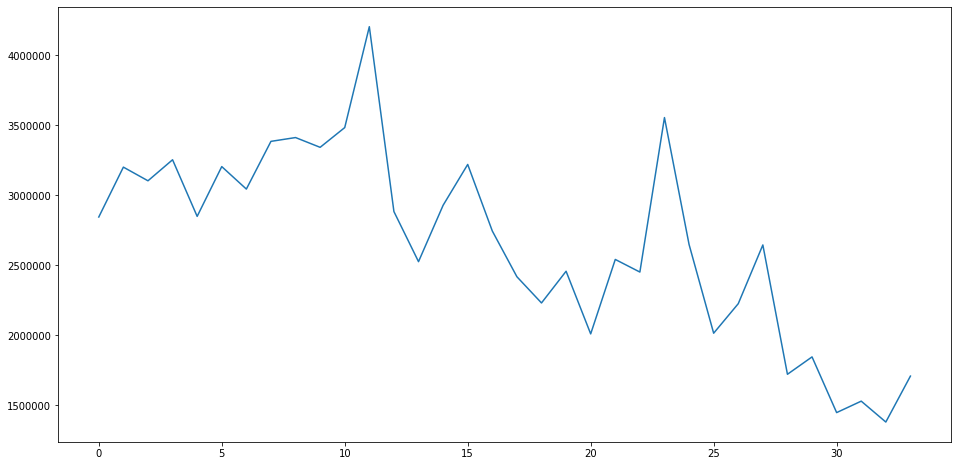

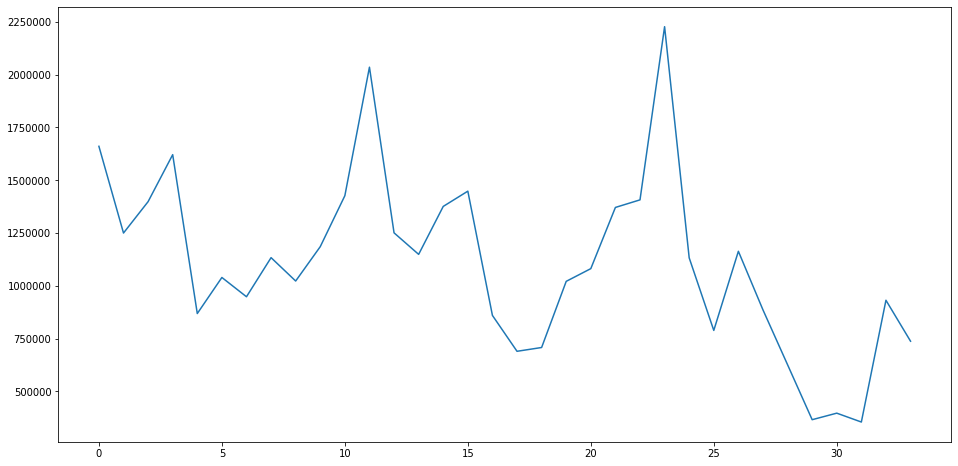

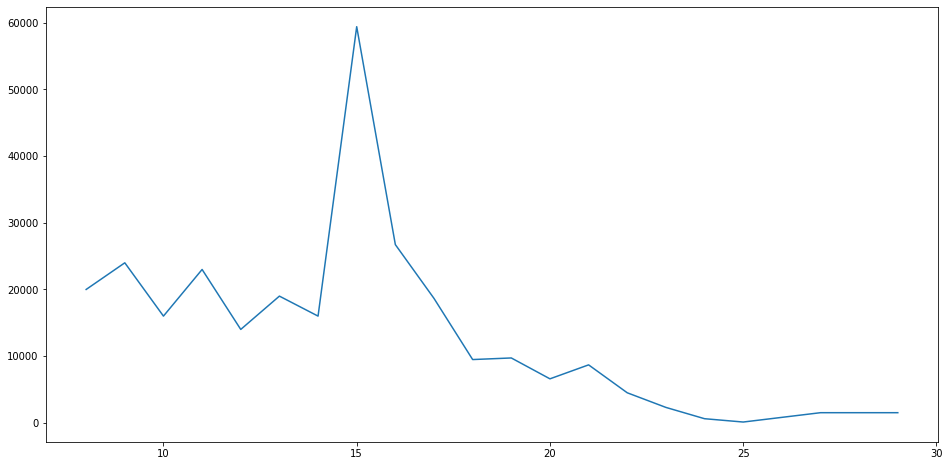

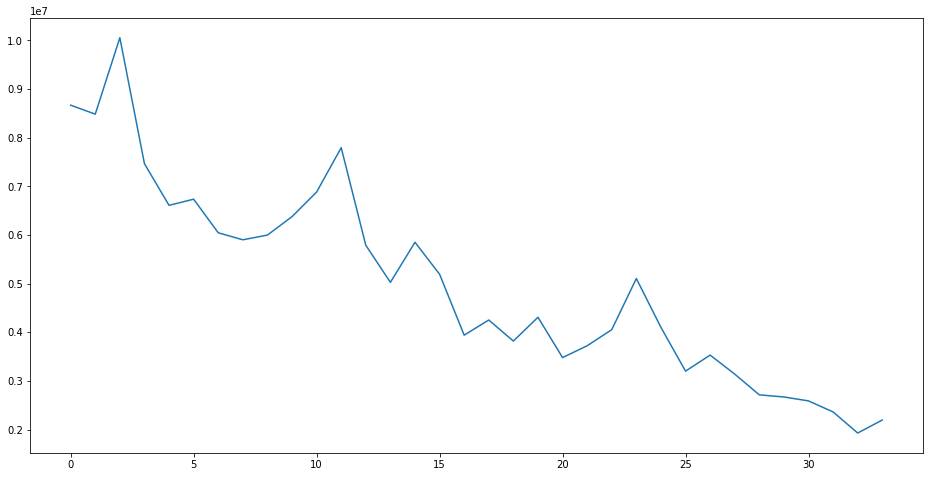

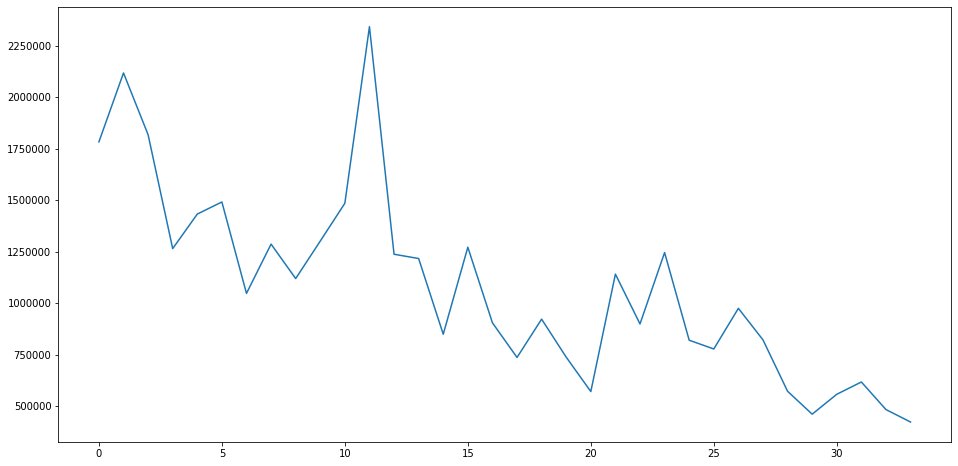

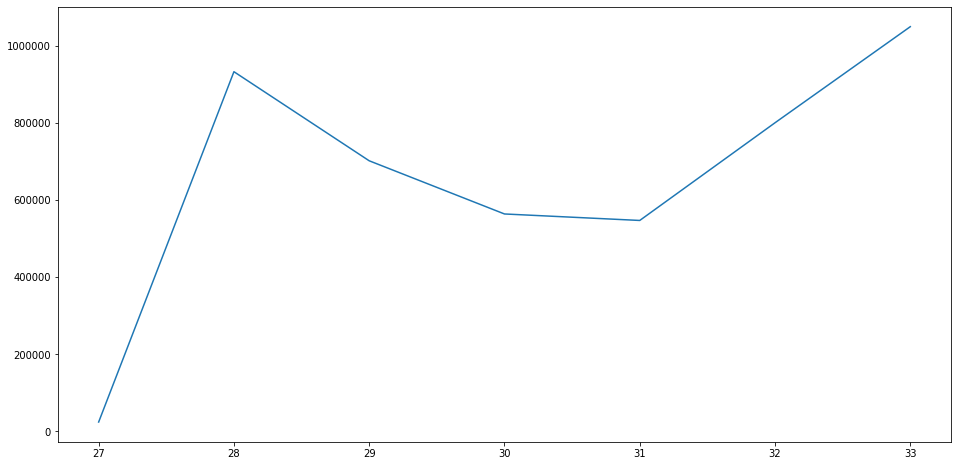

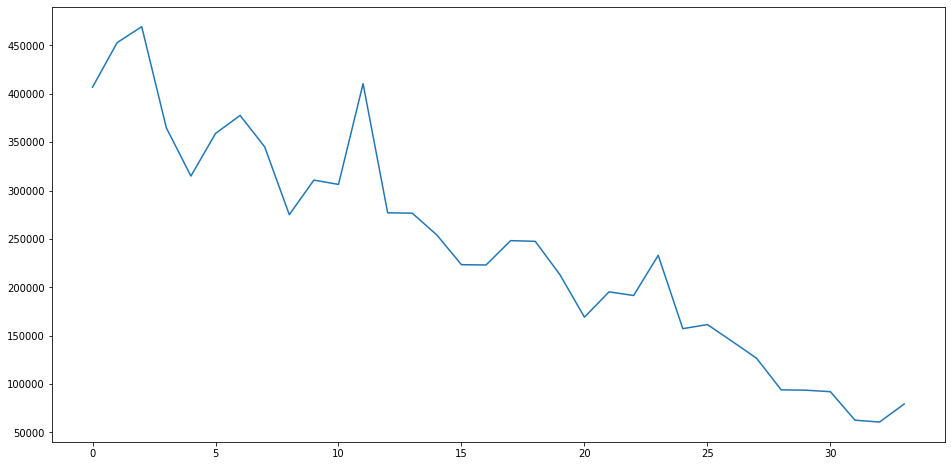

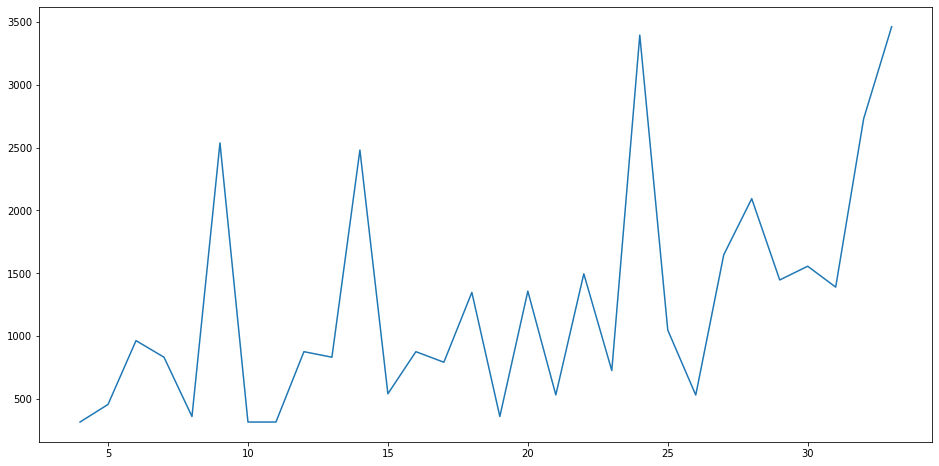

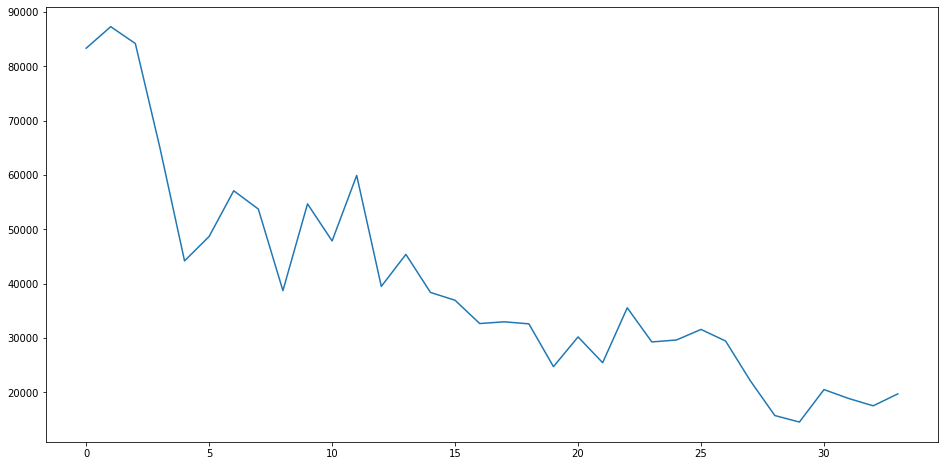

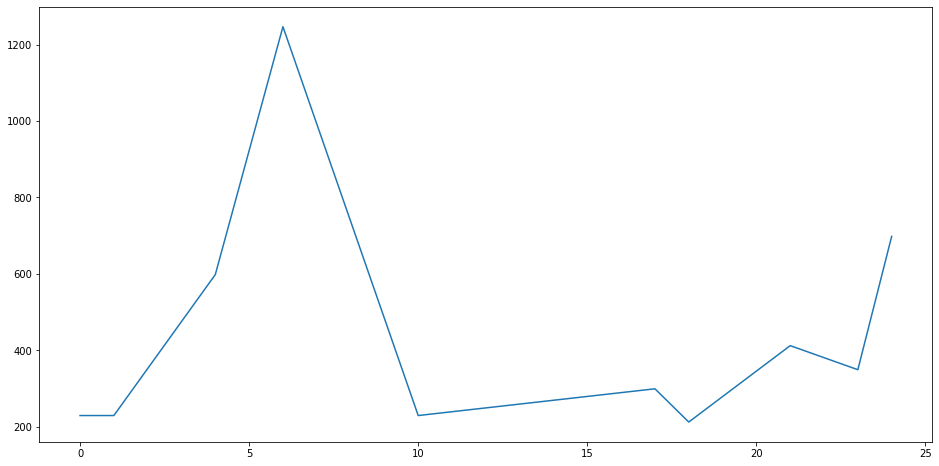

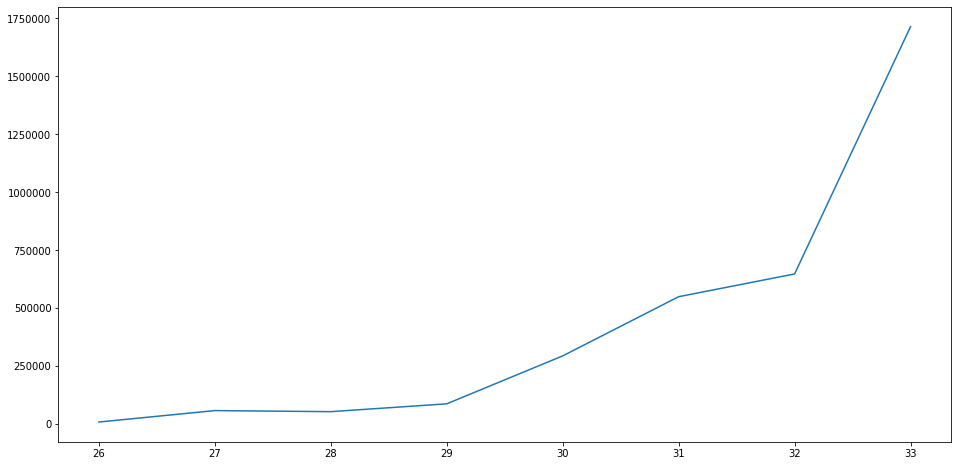

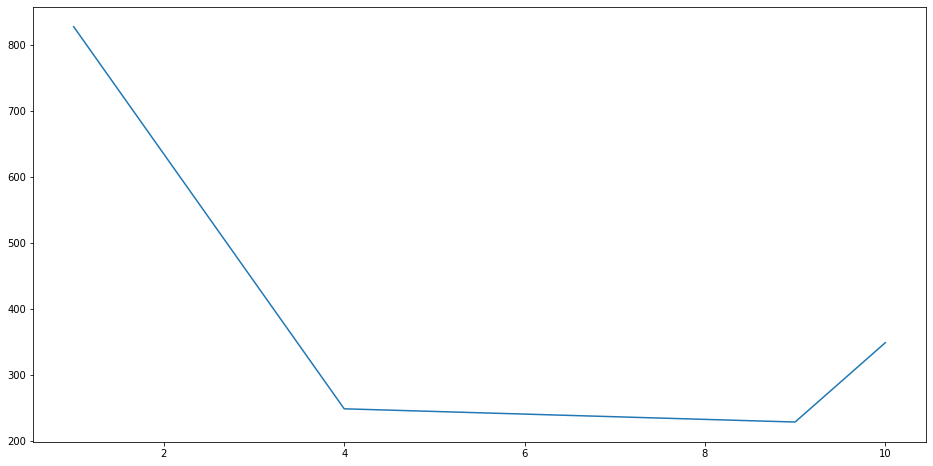

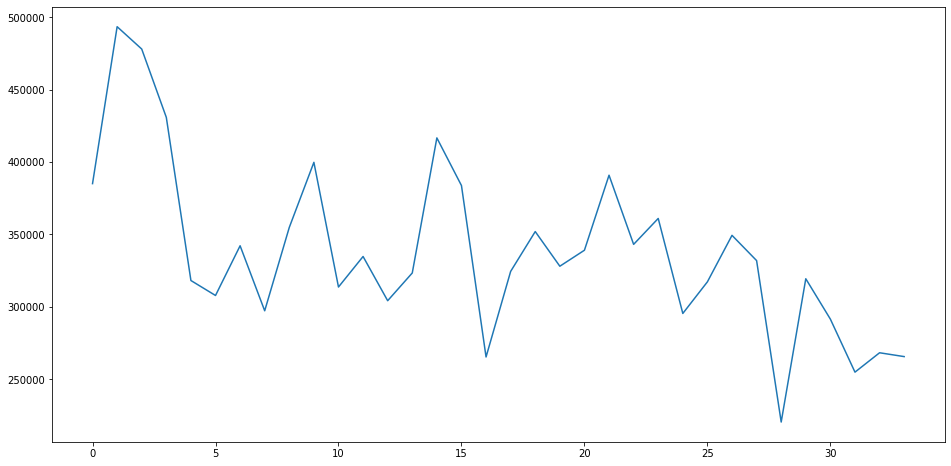

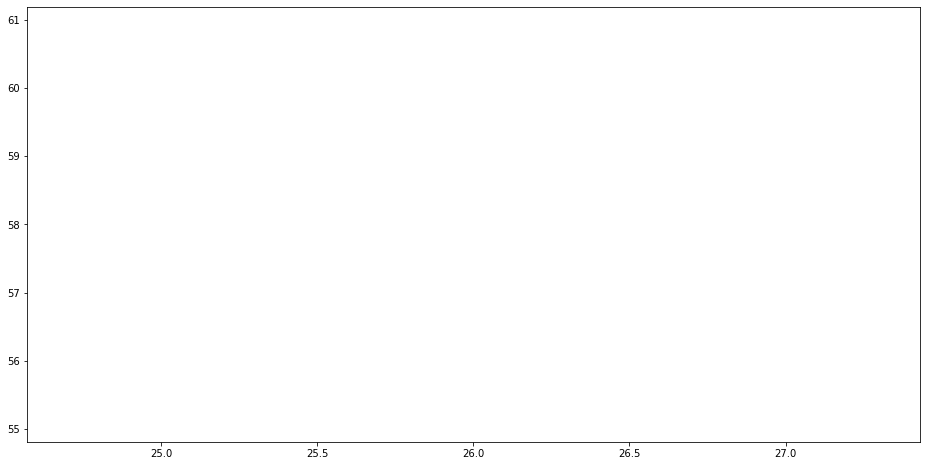

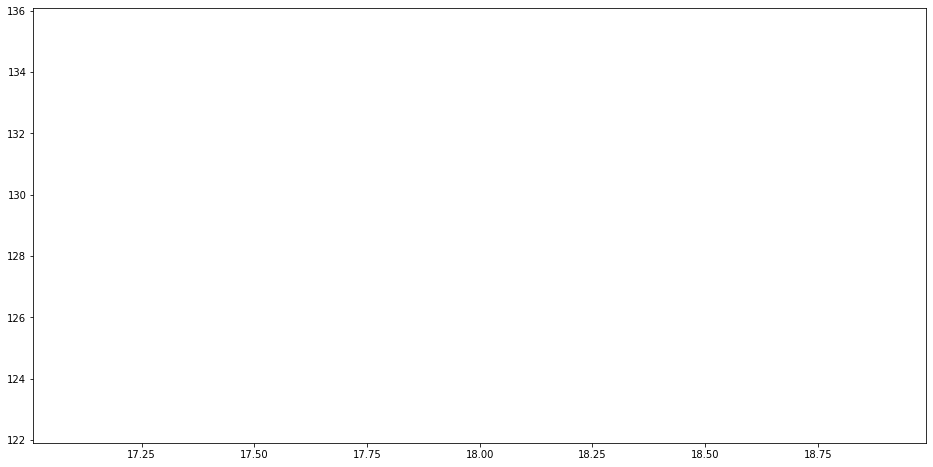

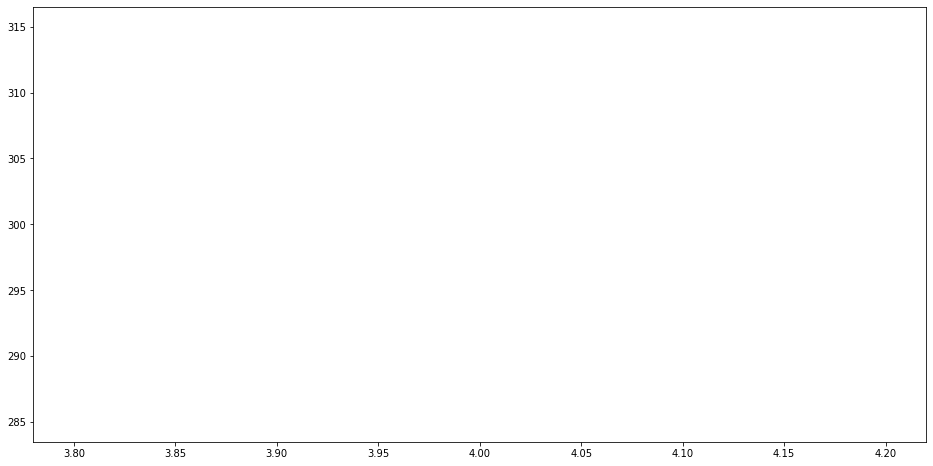

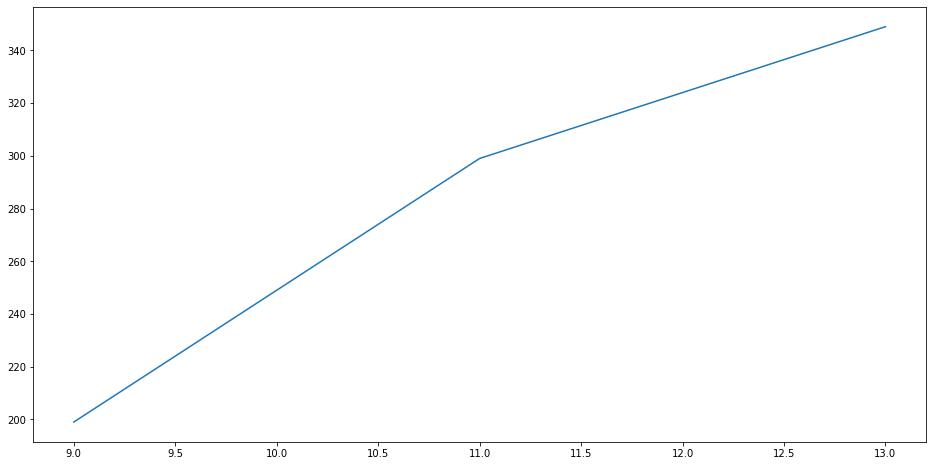

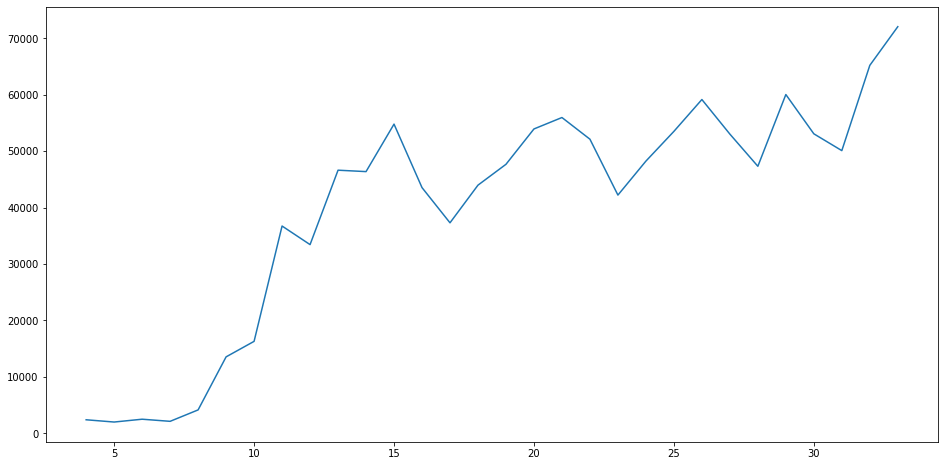

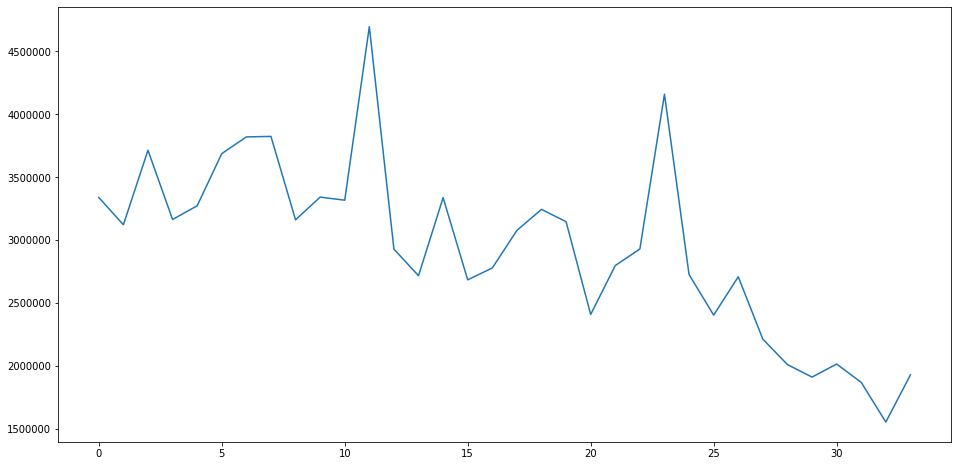

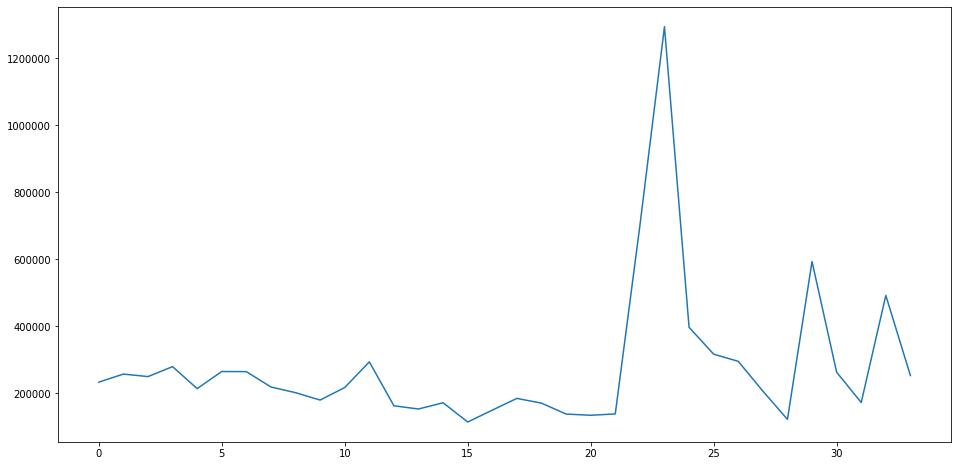

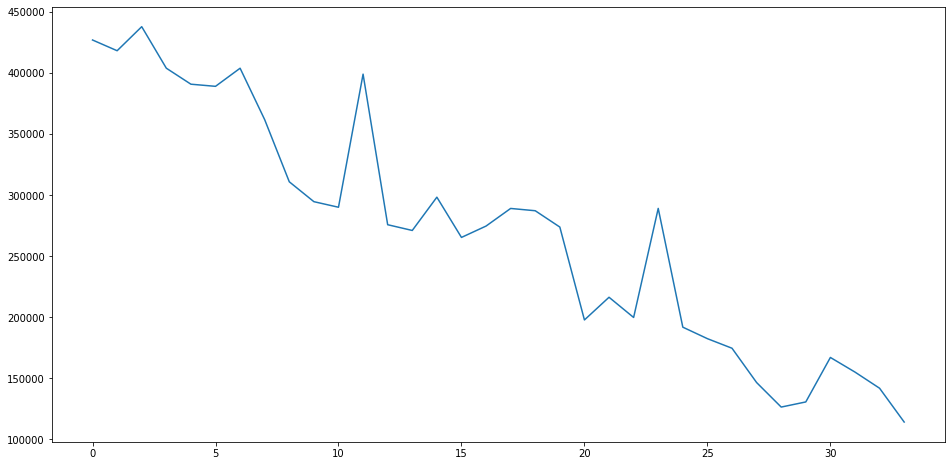

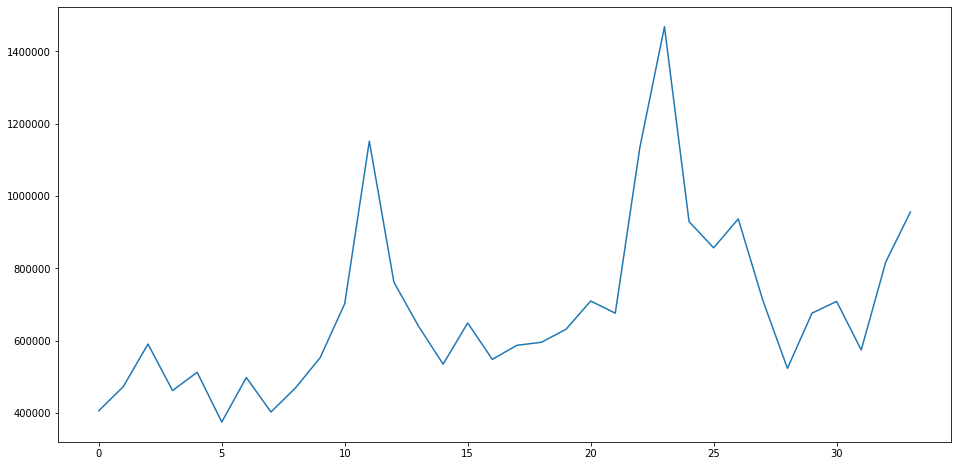

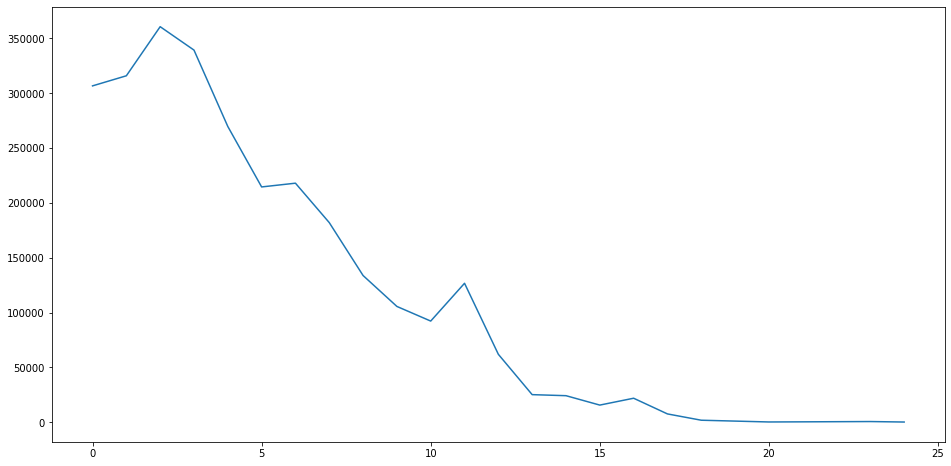

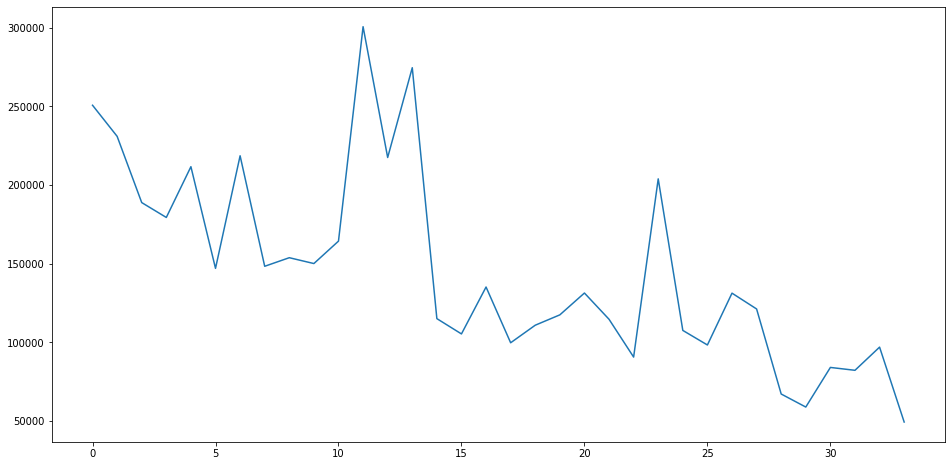

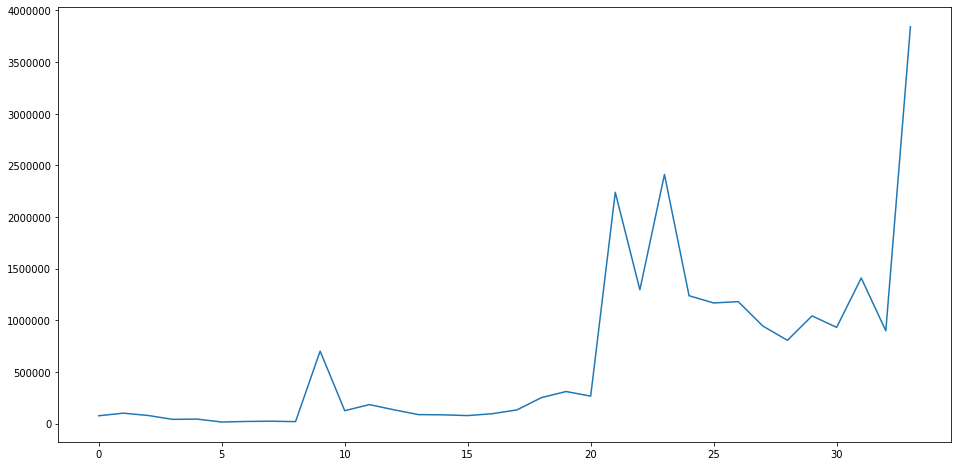

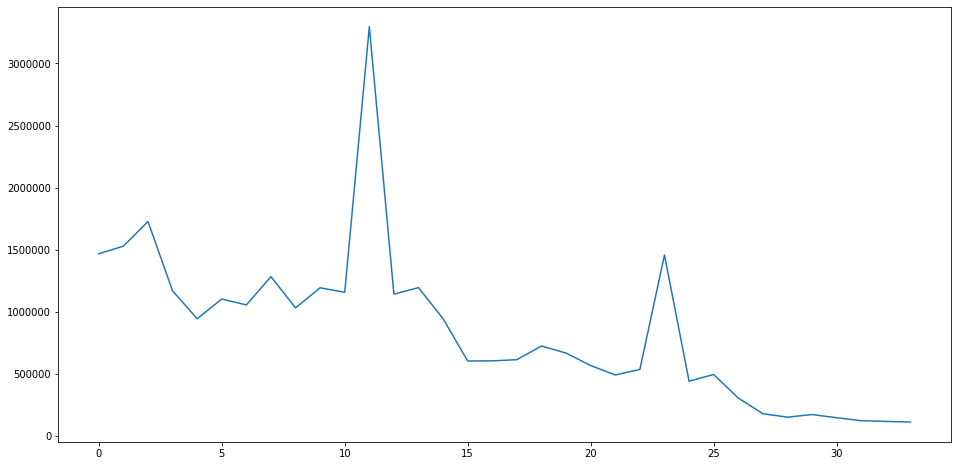

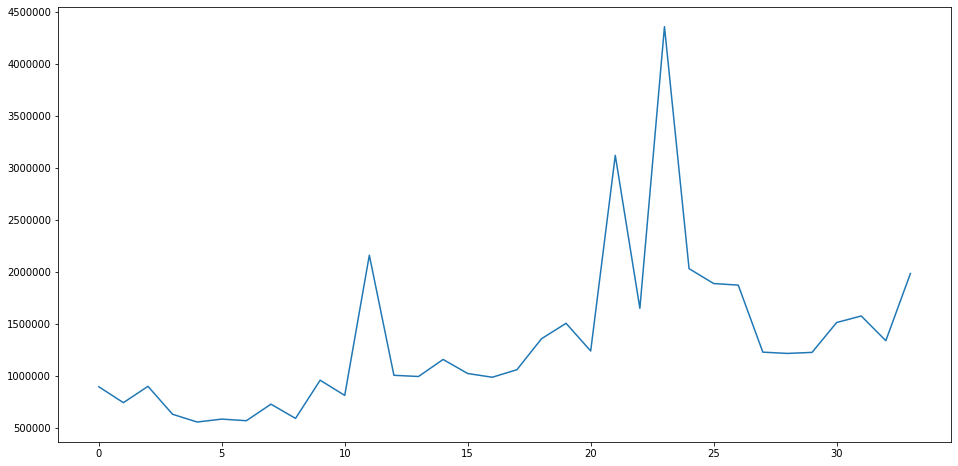

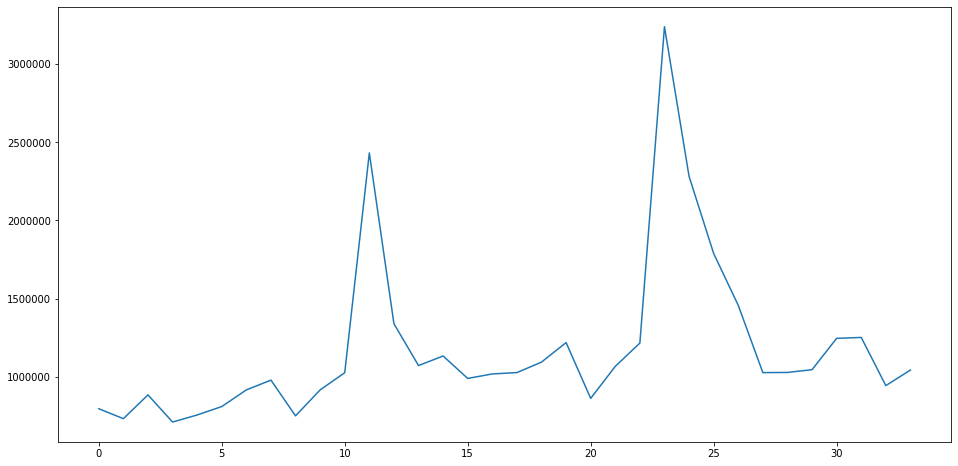

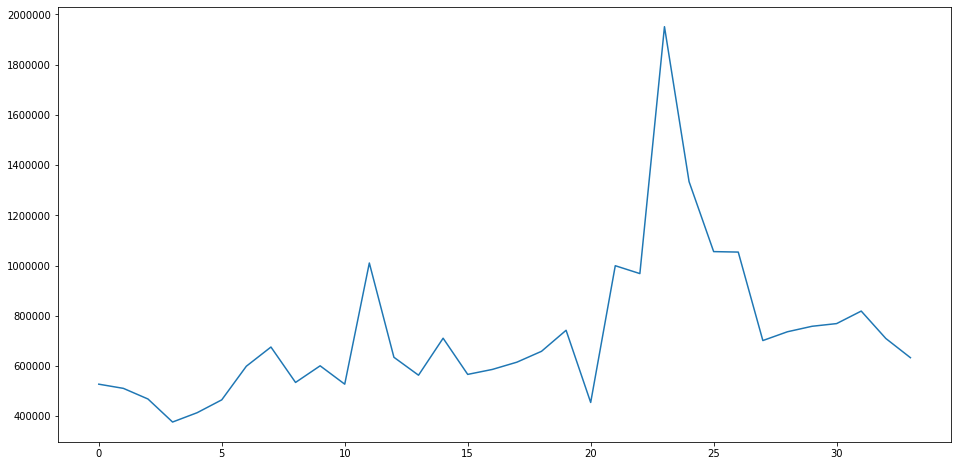

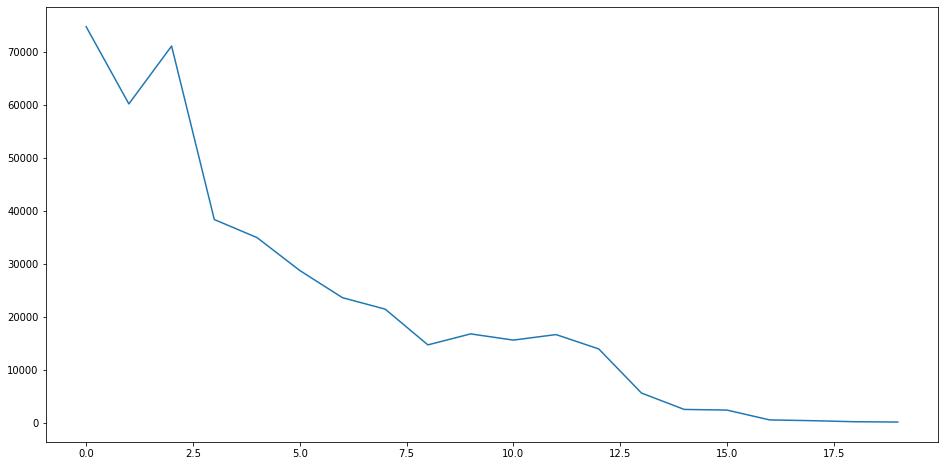

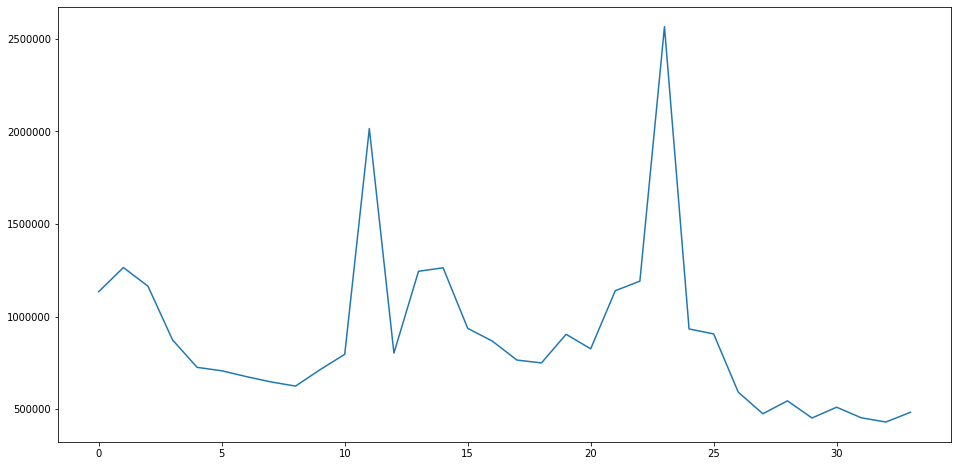

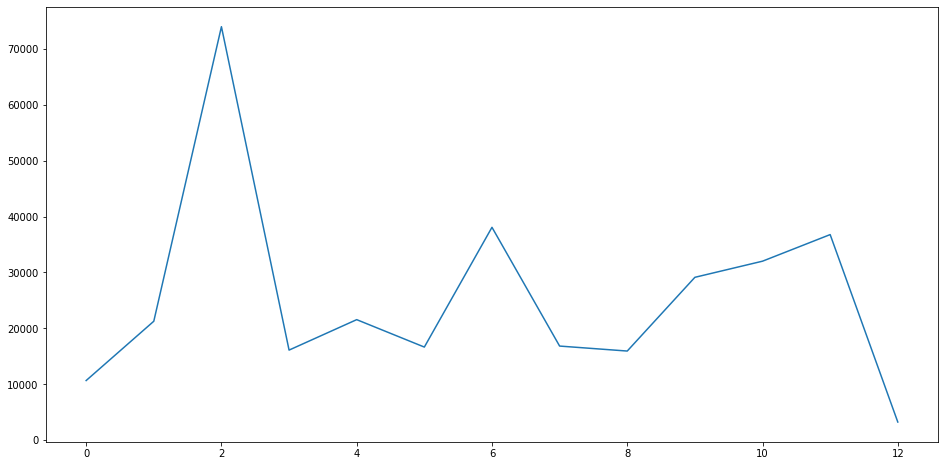

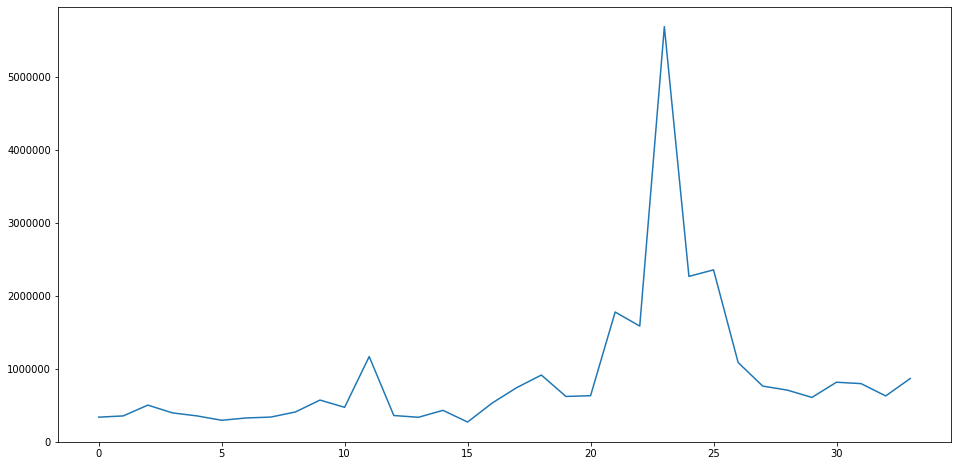

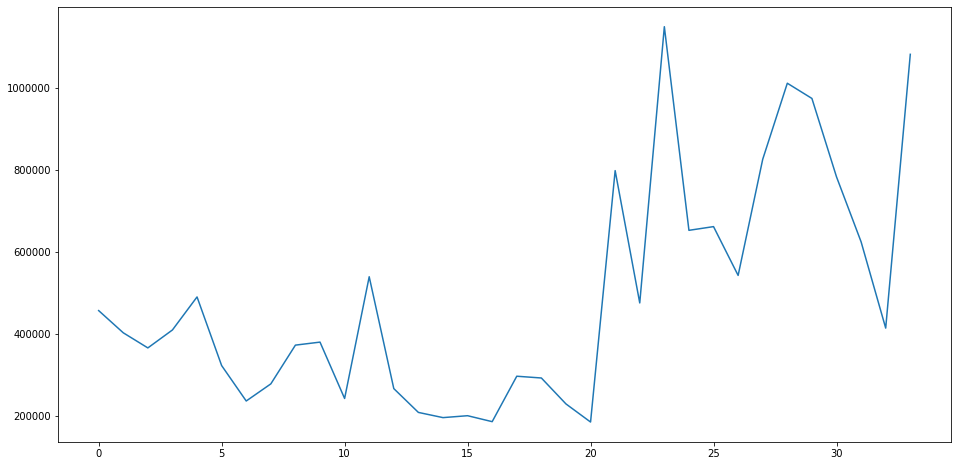

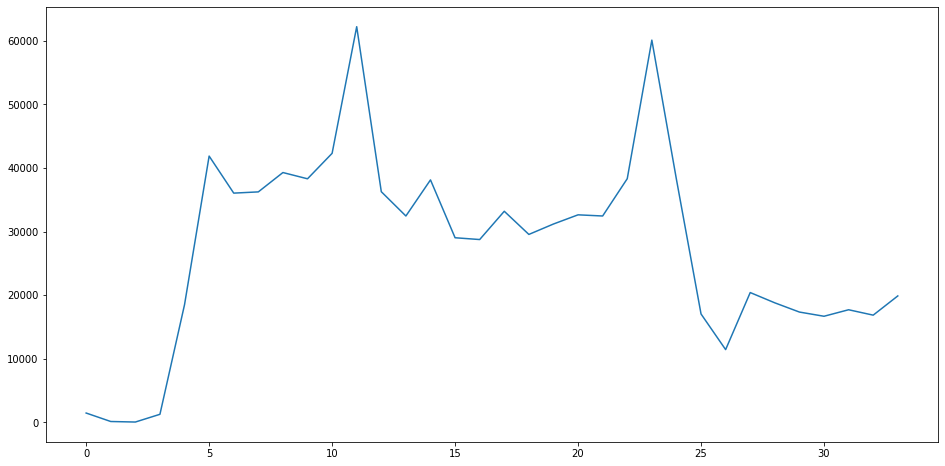

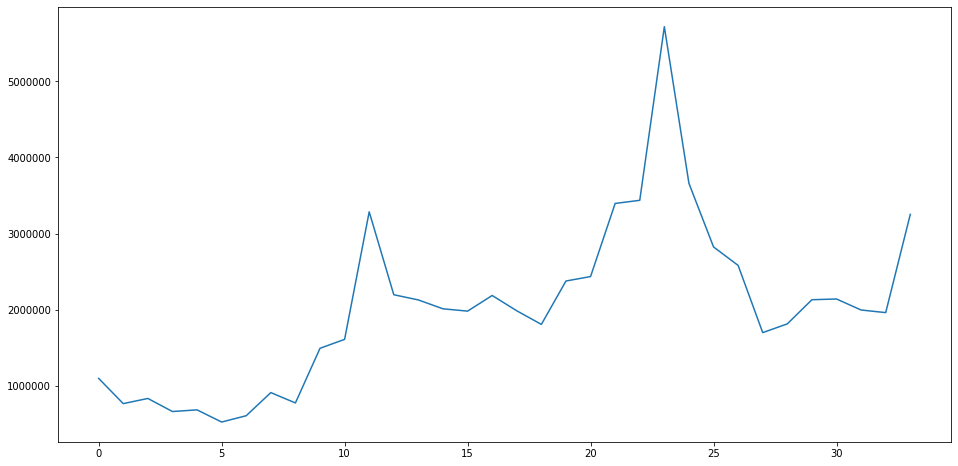

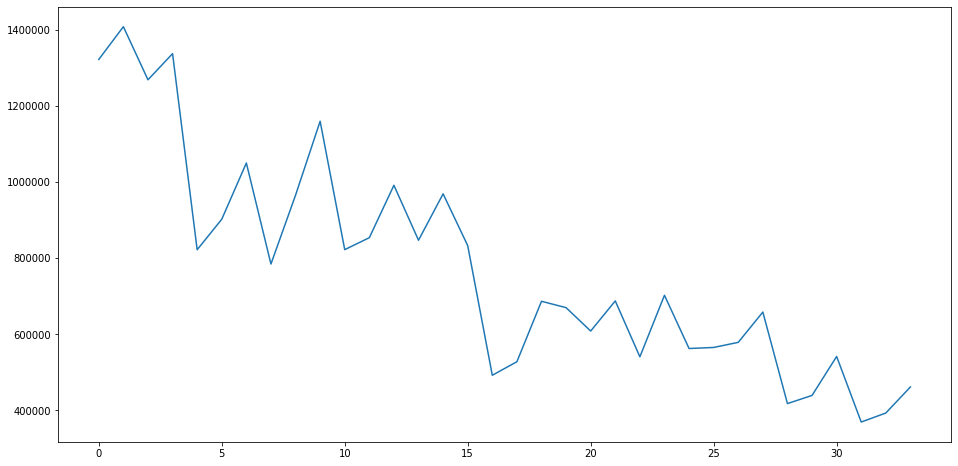

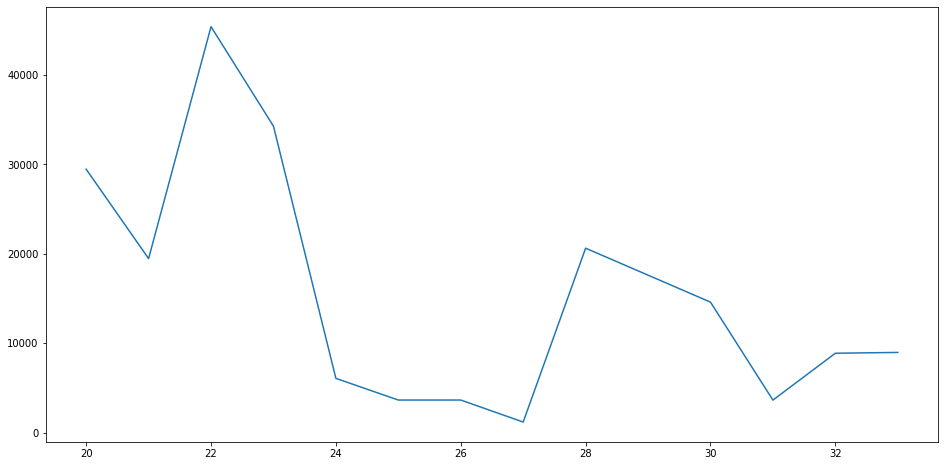

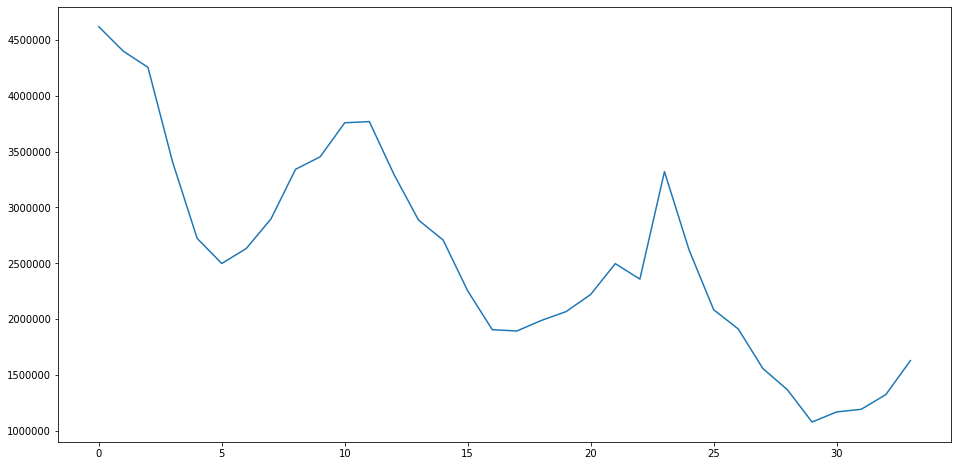

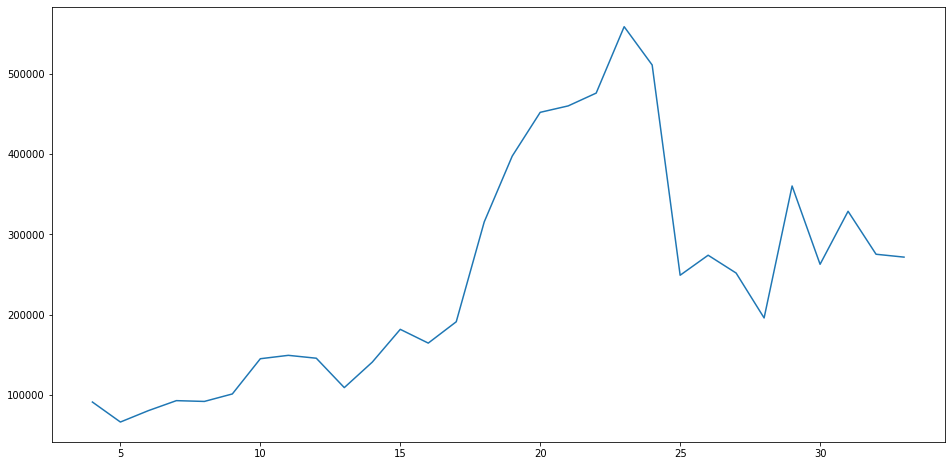

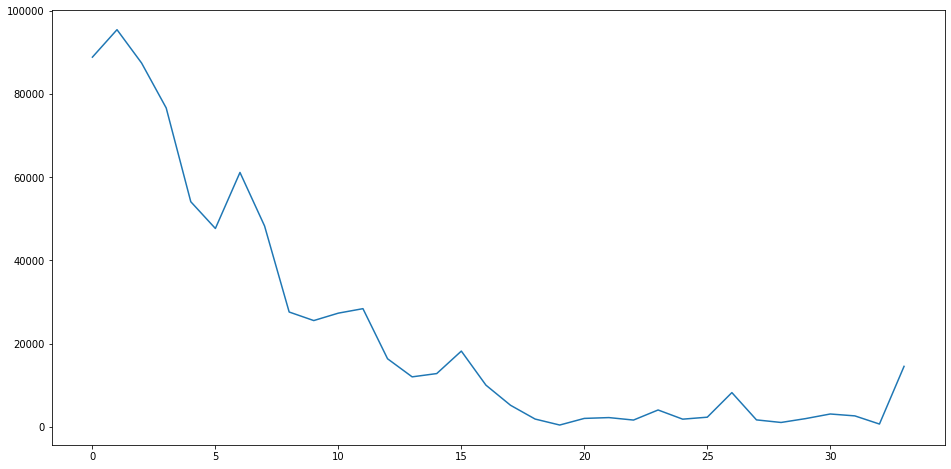

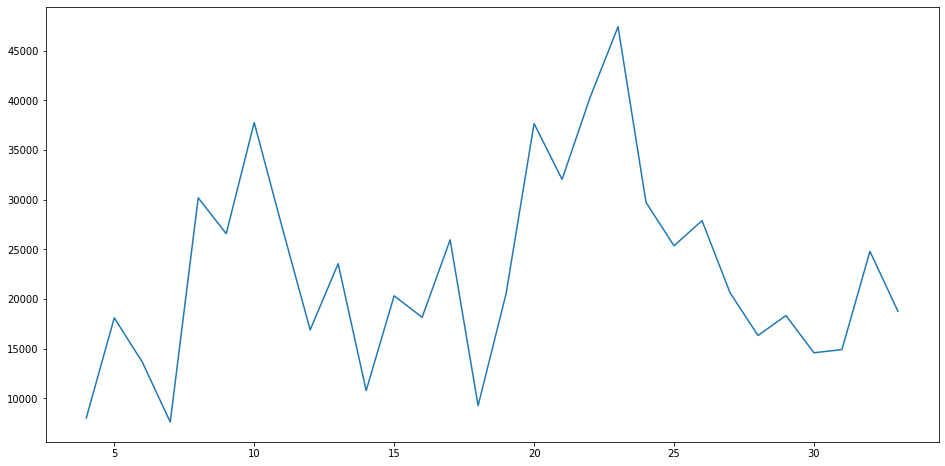

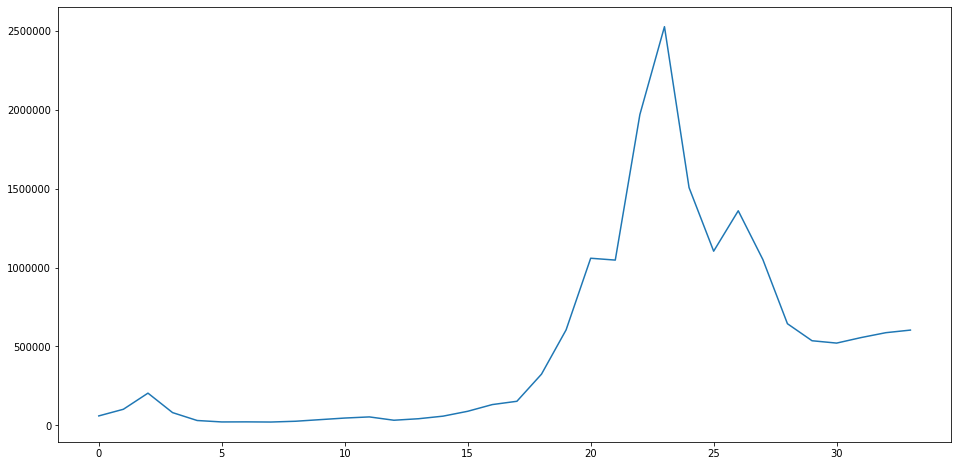

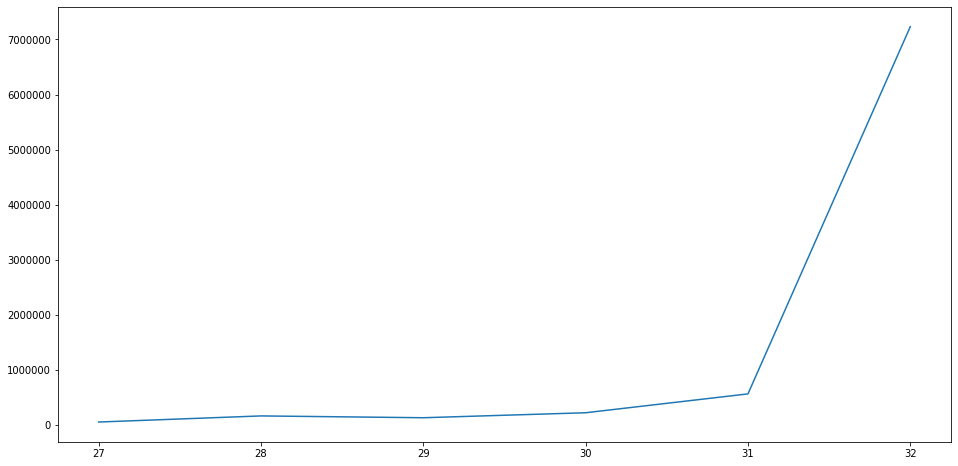

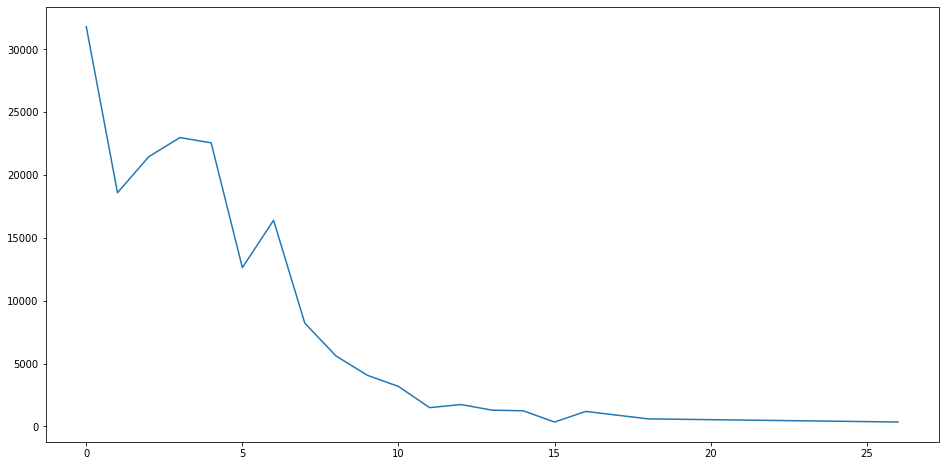

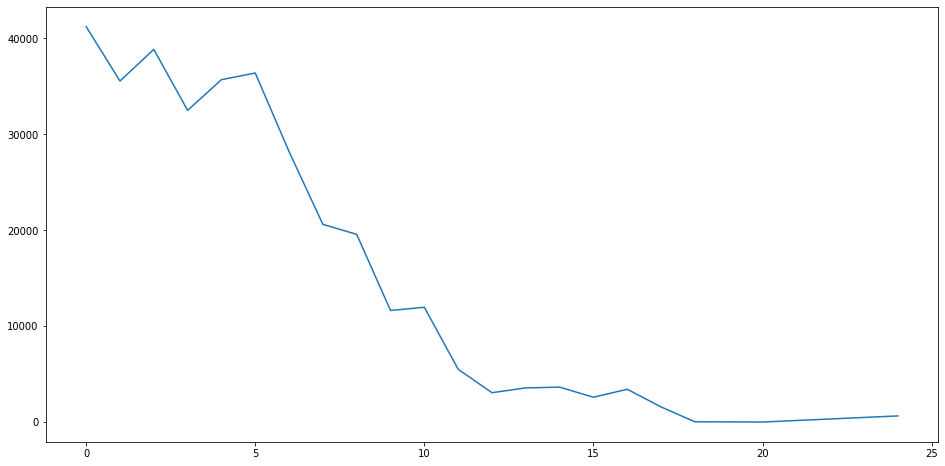

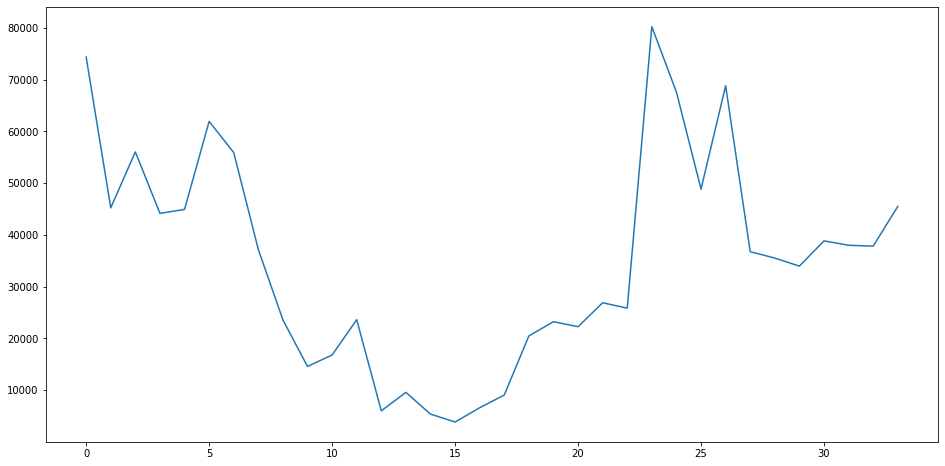

In [36]:
for i in item_category_id:
    tmp=item_categories[item_categories['item_category_id']==i]
    plt.figure(figsize=(16,8))
    plt.plot(tmp[['date_block_num']],tmp[['revenue']]);

In [39]:
result=pd.pivot_table(train_merged, values='revenue', index='date_block_num', columns='item_category_id', aggfunc='sum', dropna=False)

In [40]:
result.to_excel("..\\result\\02_商品カテゴリごとの月別売上.xlsx")